In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

# Import necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.inspection import permutation_importance

In [4]:
# all_datasets = ['manual_mc1', 'manual_tf3', 'manual_mnn1', 'manual_sys1', 'manual_stress2', 'user7zip', 'usercp2k', 'usercrypto', 'usergzip', 'userstream2', 'userfio', 'userramspeed', 'usertinymemb', 'userlinux', 'idle']
all_datasets = ['exp1multi4app1model1', 'exp1multi4app2model1', 'exp1multi4app3model1', 'exp1multi4app4model1', 'exp1multi4model1', 'exp2multi4app1model1', 'exp2multi4app2model1', 'exp2multi4app3model1', 'exp2multi4app4model1', 'exp2multi4model1', 'exp3multi4app1model1', 'exp3multi4app2model1', 'exp3multi4app3model1', 'exp3multi4app4model1', 'exp3multi4model1', 'exp4multi4app1model1', 'exp4multi4app2model1', 'exp4multi4app3model1', 'exp4multi4app4model1', 'exp4multi4model1', 'exp5multi4app1model1', 'exp5multi4app2model1', 'exp5multi4app3model1', 'exp5multi4app4model1', 'exp5multi4model1', 'exp1multi', 'exp2multi', 'exp3multi', 'exp4multi', 'exp5multi', 'exp6multi', 'exp1multiapp1model1', 'exp1multiapp2model1', 'exp1multiapp3model1', 'exp2multiapp1model1', 'exp2multiapp2model1', 'exp2multiapp3model1', 'exp3multiapp1model1', 'exp3multiapp2model1', 'exp3multiapp3model1', 'exp4multiapp1model1', 'exp4multiapp2model1', 'exp4multiapp3model1', 'exp5multiapp1model1', 'exp5multiapp2model1', 'exp5multiapp3model1', 'exp6multiapp1model1', 'exp6multiapp2model1', 'exp6multiapp3model1', 'mc', 'mc2', 'tf', 'mnn', 'mnn-2', 'sys', 'sys-2', 'stress', '7zip', 'cp2k', 'crypto', 'gzip', 'stream', 'fio', 'leveldb', 'mbw', 'ramspeedsmp', 'tinymemb', 'litesql', 'lkernel', 'filebench_all', 'ycsbmongo_all2', 'syscpu', 'sysmem', 'idle', 'exp1model1','exp2model1','exp3model1','exp4model1','exp5model1','exp6model1','exp7app1model1','exp7app2model1','exp8app1model1','exp8app2model1','exp9app1model1','exp9app2model1','exp10app1model1','exp10app2model1','exp11app1model1','exp11app2model1', 'exp7model1', 'exp8model1', 'exp9model1', 'exp10model1', 'exp11model1', 'exp12model1', 'exp12app1model1', 'exp12app2model1', 'exp12model2', 'exp12app1model2', 'exp12app2model2', 'exp12app3model2', 'exp13model1', 'exp13app1model1', 'exp13app2model1', 'exp13model2', 'exp13app1model2', 'exp13app2model2', 'exp13app3model2', 'all_mem', 'all_tf', 'all_mnn', 'all_sys', 'all_7zip', 'all_cp2k', 'all_cryptopp', 'all_gzip', 'all_stream', 'all_fio', 'all_ramspeed', 'all_tinymembench', 'all_linux', 'all_leveldb', 'all_mbw', 'all_sqlite', 'stresscpu', 'stressdram', 'stressdisk', 'exp14model1', 'exp14app1model1', 'exp14app2model1', 'exp15model1', 'exp15app1model1', 'exp15app2model1', 'exp16model1', 'exp16app1model1', 'exp16app2model1', 'exp17model1', 'exp17app1model1', 'exp17app2model1']
df_all = {}
for i in all_datasets:
    if i.endswith('model1'):
        
        df_all[i.split('model1')[0]] = pd.read_csv("datasets/final-" + i + ".csv")
    else:
        df_all[i] = pd.read_csv("datasets/final-" + i + ".csv")
# df1 = pd.read_csv("datasets/final-mc.csv")
# df2 = pd.read_csv("datasets/final-tf.csv")
# df3 = pd.read_csv("datasets/final-mnn.csv")
# df4 = pd.read_csv("datasets/final-sys.csv")
# df5 = pd.read_csv("datasets/final-stress.csv")
# df1 = df1.loc[:, ~df1.columns.str.contains('^Unnamed')]
# df2 = df2.loc[:, ~df2.columns.str.contains('^Unnamed')]
# df3 = df3.loc[:, ~df3.columns.str.contains('^Unnamed')]
# df4 = df4.loc[:, ~df4.columns.str.contains('^Unnamed')]
# df5 = df5.loc[:, ~df5.columns.str.contains('^Unnamed')]
for test in df_all:
    df_all[test] = df_all[test].loc[:, ~df_all[test].columns.str.contains('^Unnamed')]
    df_all[test] = df_all[test][sorted(df_all[test].columns)]
    cols = list(df_all[test].columns.values)
    cols.pop(cols.index('power'))
    cols.pop(cols.index('pkg_pwr')) #Remove package power from list
    cols.pop(cols.index('ram_pwr')) #Remove RAM power from list
    df_all[test] = df_all[test][cols+['pkg_pwr', 'ram_pwr', 'power']]
    
    


In [132]:
# p_idle = np.mean(df_all['idle'].power)
# p_idle = 110

In [133]:
# trainset = ['manual_mc1', 'manual_tf3', 'manual_mnn1', 'manual_sys1', 'manual_stress2', 'user7zip', 'usercp2k', 'usercrypto', 'usergzip', 'userstream2', 'userfio', 'userramspeed', 'usertinymemb', 'userlinux', 'idle']
# trainset = ['mc', 'mc2', 'tf', 'mnn', 'mnn-2', 'sys', 'sys-2', 'stress', '7zip', 'cp2k', 'crypto', 'gzip', 'stream', 'fio', 'leveldb', 'mbw', 'ramspeedsmp', 'tinymemb', 'litesql', 'lkernel', 'filebench_all', 'ycsbmongo_all2', 'syscpu', 'sysmem', 'idle']
trainset = ['exp1','exp2','exp3','exp4','exp5','exp6','exp7','exp8','exp9','exp7app1','exp7app2','exp8app1','exp8app2','exp9app1','exp9app2']
testset = ['exp8']
ignoreset = ['filebench_all', 'ycsbmongo_all2',]
# ignoreset = ['mc', 'tf', 'mnn', 'mnn-2', 'sys', 'sys-2', 'stress']
ignoreset = ['exp7','exp8','exp9']
alwaysignore = ['exp7app1','exp7app2','exp8app1','exp8app2','exp9app1','exp9app2']
# alwaysignore = ['7zip', 'cp2k', 'crypto', 'gzip', 'stream', 'fio', 'leveldb', 'mbw', 'ramspeedsmp', 'tinymemb', 'litesql', 'lkernel', 'syscpu', 'sysmem', 'mc2', 'idle']
df_train = pd.DataFrame()
# df_train = df_all[trainset[0]]
# print(trainset[0], "included in training set")
for t in trainset:
    if t in testset or t in ignoreset or t in alwaysignore:
        continue
    df_train = df_train.append(df_all[t], ignore_index=True)
    print(t, "included in training set")

df_test = pd.DataFrame()
for t in testset:
    df_test = df_test.append(df_all[t], ignore_index=True)
    print(t, "included in testing set")

exp1 included in training set
exp2 included in training set
exp3 included in training set
exp4 included in training set
exp5 included in training set
exp6 included in training set
exp8 included in testing set


/var/folders/d7/qtwn8x393s907c0ztnpz3k7w0000gn/T/ipykernel_76430/3476734208.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_all[t], ignore_index=True)
/var/folders/d7/qtwn8x393s907c0ztnpz3k7w0000gn/T/ipykernel_76430/3476734208.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(df_all[t], ignore_index=True)


In [5]:
# res_df = pd.DataFrame()
svr_i = 0
beta_0 = {}
preds_1 = {}
df_t = {}
def run_models(ts):
    global svr_i
    global beta_0
    print(ts)
    p_flag = True
    b_flag = True
    r_flag = True
    preds1 = {}
    df_idle = pd.read_csv("datasets/final-idlerun.csv")
    df_idle = df_idle.loc[:, ~df_idle.columns.str.contains('^Unnamed')]
    p_idle = np.mean(df_idle.power)
    df_mean = []
    for i in df_idle:
        df_mean.append(np.mean(df_idle[i]))
#         print(np.mean(df_idle[i]))
#     print(df_mean)
    if p_flag == True:

        df_train.power -= p_idle
    if r_flag == True:
        colNames = ["LLC-load-misses", "LLC-loads", "LLC-store-misses", "LLC-stores", "blocks", "bytes", "cycles", "instructions", "ref-cycles"]
        i = 0
        for cols in colNames:
            df_train[cols] -= df_mean[i]
            df_test[cols] -= df_mean[i]
            i += 1
    
#     ss = StandardScaler(with_std=False)
    ss = MinMaxScaler()
    sc_X = ss.fit_transform(df_train)
    sc_X = pd.DataFrame(data=sc_X)
    # ss = StandardScaler()
    sc_Y = ss.transform(df_test)
    sc_Y = pd.DataFrame(data=sc_Y)

    X1 = sc_X.iloc[:, np.r_[:4,4:9]].values
    y1 = df_train.iloc[:, -1:].values
    X2 = sc_Y.iloc[:, np.r_[:4,4:9]].values
    y2 = df_test.iloc[:, -1:].values

    std_=np.std(df_train.power)
    mean_=np.mean(df_train.power)
    def destandardize(var):
        return var
#         newVar=var+mean_
#         return newVar
    

    model = MLPRegressor(hidden_layer_sizes= (512,16,16,),learning_rate='constant', alpha= 0.0001, learning_rate_init= 0.1, max_iter= 10000, activation= 'relu')
    model.fit(X1, y1)
    y_pred = model.predict(X2)
    y_pred=destandardize(y_pred)
    preds1['NN'] = y_pred.flatten()
    
    ss = StandardScaler(with_std=False)
#     ss = MinMaxScaler()
    sc_X = ss.fit_transform(df_train)
    sc_X = pd.DataFrame(data=sc_X)
    # ss = StandardScaler()
    sc_Y = ss.transform(df_test)
    sc_Y = pd.DataFrame(data=sc_Y)

    X1 = sc_X.iloc[:, np.r_[:4,4:9]].values
    y1 = df_train.iloc[:, -1:].values
    X2 = sc_Y.iloc[:, np.r_[:4,4:9]].values
    y2 = df_test.iloc[:, -1:].values

    model = LinearRegression(fit_intercept=b_flag)
    model.fit(X1, y1)
    beta_0[ts[:-1]] = model.intercept_
    y_pred = model.predict(X2)
    print(beta_0)
    y_pred=destandardize(y_pred)
    preds1['Linear Regression'] = y_pred.flatten()

    model = DecisionTreeRegressor()
    model.fit(X1, y1)
    y_pred = model.predict(X2)
    y_pred=destandardize(y_pred)
    preds1['Decision Tree'] = y_pred.flatten()

    model = RandomForestRegressor()
    model.fit(X1, y1)
    print(model.feature_importances_)
#     perm = permutation_importance(model, X1, y1, n_repeats=10, random_state=0)
#     print(perm.importances_mean)
    y_pred = model.predict(X2)
    y_pred=destandardize(y_pred)
    preds1['Random Forest'] = y_pred.flatten()

    model = SVR()
    model.fit(X1, y1)
#     perm = permutation_importance(model, X1, y1, n_repeats=10, random_state=0)
#     print(perm.importances_mean)
    svr_i = model.intercept_
    print("SVR intercept:", model.intercept_)
    y_pred = model.predict(X2)
    y_pred=destandardize(y_pred)
    preds1['SVR'] = y_pred.flatten()

    # model = XGBRegressor(n_estimators=1000,max_depth=3,eta=0.001, booster='gbtree')
    # model.fit(X1, y1)
    # y_pred = model.predict(X2)
    # y_pred=destandardize(y_pred)
    # preds1['XGBoost'] = y_pred.flatten()

    params = {
    'n_estimators': 900,    # You can adjust this based on your dataset size and compute resources
    'max_depth': 6,         # Experiment with values in the range of 3 to 10
    'learning_rate': 0.03,  # Adjust this based on your problem and dataset
    'subsample': 0.6,      # Control the fraction of data used for each boosting round
    'colsample_bytree': 0.6,  # Fraction of features used for each tree
    'min_child_weight': 3,    # Tune this depending on dataset characteristics
    'gamma': 3,              # Regularization parameter
    'random_state': 42      # Set a random seed for reproducibility
}
    model = XGBRegressor(**params)
    model.fit(X1, y1)
    y_pred = model.predict(X2)
    y_pred=destandardize(y_pred)
    preds1['XGBoost'] = y_pred.flatten()

    model = Lasso(alpha=0.1)
    model.fit(X1, y1)
    y_pred = model.predict(X2)
    y_pred=destandardize(y_pred)
    preds1['Lasso'] = y_pred.flatten()
    
    preds_1[ts] = preds1

#     models = ['NN', 'Linear Regression', 'Decision Tree', 'Random Forest', 'SVR', 'XGBoost', 'Lasso']
#     models = ['Linear Regression', 'Random Forest', 'SVR']
#     models = ['Random Forest', 'SVR']
#     models = ['NN']
#     results1 = {}
#     oldY=df_test.power
#     std_Y=np.std(df_test.power)
#     for m in models:
#         l = len(preds1[m])
#         p1 = (preds1[m][:l])
#         total_pred = p1 if p_flag == False else (p1 + p_idle)
#         mae = mean_absolute_error(oldY[:l], total_pred)
#         mape = mean_absolute_percentage_error(oldY[:l], total_pred)
#         mae = round(mae, 2)
#         mape = round((mape*100), 2)
#         std_Y = round(std_Y, 2)
#         print(m)
# #         print("Mean absolute error:", mae)
#         print("Mean absolute percentage error:", mape)
# #         print("Standard deviation of test set:", std_Y)
#         # add results to dictionary
#         results1[m] = [mae, mape, std_Y]
        
#         df_plot = pd.DataFrame({'Actual': oldY[:l], 'Pred': total_pred})
#         plt.figure(figsize=(10, 3))
#         plt.plot(df_plot)
#         plt.legend(df_plot.columns)
#         plt.ylabel("Power in Watts")
#         plt.xlabel("Time in Seconds")
#         plt.show()

#     results1_df = pd.DataFrame(results1, index=['MAE', 'MAPE', 'STD'])
#     res_df = res_df.append(results_df, ignore_index=True)
#     print('MAPE:')
#     for i, row in results_df.T.iterrows():
#         print(i + ' ' +  str(row['MAPE']) + '%')

#     for i, row in results1_df.T.iterrows():
#         print(row['MAE'])
#         print(row['MAPE'])
#         print(row['STD'])
#         print(0)

nope  = ['exp7','exp8','exp10','exp11','exp12','exp13','exp14', 'exp15', 'exp16', 'exp17']
# testing  = ['exp7app1','exp8app1','exp10app1','exp11app1','exp12app1','exp13app1', 'exp14app1','exp15app1','exp16app1','exp17app1']
# testing  = ['exp7','exp8','exp10','exp11','exp12','exp13','exp14', 'exp15', 'exp16', 'exp17']
testing = ['exp1multi4app1', 'exp2multi4app1', 'exp3multi4app1', 'exp4multi4app1', 'exp5multi4app1']
# nope = [['exp10','exp11','exp12', 'exp15', 'exp16'],['exp12','exp13','exp16','exp17'],['exp7','exp14','exp15','exp16','exp17'],['exp7','exp12','exp13','exp14','exp15'],['exp7','exp8','exp11'],['exp8','exp11','exp14','exp15','exp16','exp17'],['exp10','exp11','exp13','exp15','exp17'],['exp7','exp10','exp11','exp13','exp14','exp16'],['exp7','exp8','exp10','exp13','exp15','exp17'],['exp8','exp10','exp13','exp14','exp16']]
# testing = ['all_mem', 'all_sys']
for ts in testing:
    print(ts)
    trainset = ['exp1multi4', 'exp2multi4', 'exp3multi4', 'exp4multi4', 'exp5multi4']
    # trainset=['exp1','exp2','exp3','exp4','exp5','exp6','exp9']
    # trainset = ['exp1','exp2','exp3','exp4','exp5','exp6','exp7','exp8','exp9','exp10','exp11','exp12','exp13','exp14', 'exp15', 'exp16', 'exp17', 'exp7app1','exp7app2','exp7app3','exp8app1','exp8app2','exp8app3','exp9app1','exp9app2','exp9app3', 'exp10app1','exp10app2','exp10app3','exp11app1','exp11app2','exp11app3']
#     trainset += ['all_mem', 'all_tf', 'all_mnn', 'all_sys', 'all_7zip', 'all_cp2k', 'all_cryptopp', 'all_gzip', 'all_stream', 'all_fio', 'all_ramspeed', 'all_tinymembench', 'all_linux', 'all_leveldb', 'all_mbw', 'all_sqlite', 'stresscpu', 'stressdram', 'stressdisk']
    testset = [ts]
    ignore = ts[:-4]
    ignoreset = ['filebench_all', 'ycsbmongo_all2','mc', 'tf', 'mnn', 'mnn-2', 'sys', 'sys-2', 'stress']
#     ignoreset = ['exp7','exp8']
    alwaysignore = ['exp7app1','exp7app2','exp7app3','exp8app1','exp8app2','exp8app3','exp9app1','exp9app2','exp9app3','exp10app1','exp10app2','exp10app3','exp11app1','exp11app2','exp11app3']
    df_train = pd.DataFrame()
    # df_train = df_all[trainset[0]]
#     print(trainset[0], "included in training set")
    for t in trainset:
#         if t in testset or t in ignoreset or t in alwaysignore or t == ignore or t in nope[testing.index(ts)]:
        if t in testset or t in ignoreset or t in alwaysignore or t in nope or t == ignore:
#             print(t, "ignored")
            continue
        df_train = df_train.append(df_all[t], ignore_index=True)
        print(t, "included in training set")

    df_test = pd.DataFrame()
    for t in testset:
        df_test = df_test.append(df_all[t], ignore_index=True)
        print(t, "included in testing set")
    df_t[ts] = df_test

    run_models(ts)

# for i, row in res_df.T.iterrows():
#     print(row['MAE'])
#     print(row['MAPE'])
#     print(row['STD'])
#     print(0)
    

exp1multi4app1
exp2multi4 included in training set
exp3multi4 included in training set
exp4multi4 included in training set
exp5multi4 included in training set
exp1multi4app1 included in testing set
exp1multi4app1


/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_32988/1872375504.py:204: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_all[t], ignore_index=True)
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_32988/1872375504.py:209: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(df_all[t], ignore_index=True)
/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'exp1multi4app': array([146.04662259])}


/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_32988/1872375504.py:88: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X1, y1)


[0.42410659 0.13953169 0.08936371 0.13943861 0.00714544 0.00701442
 0.03926215 0.11273503 0.04140235]


/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR intercept: [142.21921382]


/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.765e+04, tolerance: 3.205e+01
  model = cd_fast.enet_coordinate_descent(
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_32988/1872375504.py:204: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_all[t], ignore_index=True)
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_32988/1872375504.py:209: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(df_all[t], ignore_index=True)
/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multila

exp2multi4app1
exp1multi4 included in training set
exp3multi4 included in training set
exp4multi4 included in training set
exp5multi4 included in training set
exp2multi4app1 included in testing set
exp2multi4app1
{'exp1multi4app': array([146.04662259]), 'exp2multi4app': array([148.49228741])}


/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_32988/1872375504.py:88: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X1, y1)


[0.51865074 0.10202262 0.12124067 0.12016325 0.00606059 0.00650424
 0.03027447 0.06492434 0.03015908]


/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR intercept: [138.03340537]


/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.181e+05, tolerance: 4.897e+01
  model = cd_fast.enet_coordinate_descent(
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_32988/1872375504.py:204: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_all[t], ignore_index=True)
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_32988/1872375504.py:209: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(df_all[t], ignore_index=True)
/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multila

exp3multi4app1
exp1multi4 included in training set
exp2multi4 included in training set
exp4multi4 included in training set
exp5multi4 included in training set
exp3multi4app1 included in testing set
exp3multi4app1
{'exp1multi4app': array([146.04662259]), 'exp2multi4app': array([148.49228741]), 'exp3multi4app': array([152.00362758])}


/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_32988/1872375504.py:88: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X1, y1)


[0.20980482 0.09276706 0.11393105 0.12504954 0.00677837 0.00641388
 0.03262186 0.37968797 0.03294545]


/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR intercept: [145.75205766]


/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.267e+05, tolerance: 4.555e+01
  model = cd_fast.enet_coordinate_descent(
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_32988/1872375504.py:204: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_all[t], ignore_index=True)
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_32988/1872375504.py:209: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(df_all[t], ignore_index=True)
/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multila

exp4multi4app1
exp1multi4 included in training set
exp2multi4 included in training set
exp3multi4 included in training set
exp5multi4 included in training set
exp4multi4app1 included in testing set
exp4multi4app1
{'exp1multi4app': array([146.04662259]), 'exp2multi4app': array([148.49228741]), 'exp3multi4app': array([152.00362758]), 'exp4multi4app': array([149.84979478])}


/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_32988/1872375504.py:88: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X1, y1)


[0.6467667  0.11767866 0.06622222 0.07695014 0.00316904 0.00311622
 0.0109062  0.06429605 0.01089477]


/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR intercept: [141.37426597]


/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.822e+04, tolerance: 4.652e+01
  model = cd_fast.enet_coordinate_descent(
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_32988/1872375504.py:204: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_all[t], ignore_index=True)
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_32988/1872375504.py:209: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(df_all[t], ignore_index=True)
/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multila

exp5multi4app1
exp1multi4 included in training set
exp2multi4 included in training set
exp3multi4 included in training set
exp4multi4 included in training set
exp5multi4app1 included in testing set
exp5multi4app1
{'exp1multi4app': array([146.04662259]), 'exp2multi4app': array([148.49228741]), 'exp3multi4app': array([152.00362758]), 'exp4multi4app': array([149.84979478]), 'exp5multi4app': array([153.19101477])}


/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_32988/1872375504.py:88: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X1, y1)


[0.45685252 0.10874314 0.12233762 0.13563853 0.00775111 0.00662674
 0.03754098 0.0872881  0.03722126]


/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR intercept: [147.14347206]


/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.059e+05, tolerance: 3.465e+01
  model = cd_fast.enet_coordinate_descent(


In [135]:
print(svr_i)
print(beta_0)

[106.19660251]
{'exp1multiapp': array([100.03192783]), 'exp2multiapp': array([100.03192783]), 'exp3multiapp': array([100.03192783]), 'exp4multiapp': array([100.03192783]), 'exp5multiapp': array([100.03192783]), 'exp6multiapp': array([100.03192783])}


In [6]:
# res_df = pd.DataFrame()

preds_2 = {}
df_t = {}
def run_models(ts):
#     global res_df
    print(ts)
    p_flag = True
    b_flag = True
    r_flag = True
    preds2 = {}

    df_idle = pd.read_csv("datasets/final-idlerun.csv")
    df_idle = df_idle.loc[:, ~df_idle.columns.str.contains('^Unnamed')]
    p_idle = np.mean(df_idle.power)
    df_mean = []
    for i in df_idle:
        df_mean.append(np.mean(df_idle[i]))
#         print(np.mean(df_idle[i]))
#     print(df_mean)
    if p_flag == True:

        df_train.power -= p_idle
    if r_flag == True:
        colNames = ["LLC-load-misses", "LLC-loads", "LLC-store-misses", "LLC-stores", "blocks", "bytes", "cycles", "instructions", "ref-cycles"]
        i = 0
        for cols in colNames:
            df_train[cols] -= df_mean[i]
            df_test[cols] -= df_mean[i]
            i += 1
    
#     ss = StandardScaler(with_std=False)
    ss = MinMaxScaler()
    sc_X = ss.fit_transform(df_train)
    sc_X = pd.DataFrame(data=sc_X)
    # ss = StandardScaler()
    sc_Y = ss.transform(df_test)
    sc_Y = pd.DataFrame(data=sc_Y)

    X1 = sc_X.iloc[:, np.r_[:4,4:9]].values
    y1 = df_train.iloc[:, -1:].values
    X2 = sc_Y.iloc[:, np.r_[:4,4:9]].values
    y2 = df_test.iloc[:, -1:].values

    std_=np.std(df_train.power)
    mean_=np.mean(df_train.power)
    def destandardize(var):
        return var
#         newVar=var+mean_
#         return newVar
    

    model = MLPRegressor(hidden_layer_sizes= (512,16,16,),learning_rate='constant', alpha= 0.0001, learning_rate_init= 0.1, max_iter= 10000, activation= 'relu')
    model.fit(X1, y1)
    y_pred = model.predict(X2)
    y_pred=destandardize(y_pred)
    preds2['NN'] = y_pred.flatten()
    
    ss = StandardScaler(with_std=False)
#     ss = MinMaxScaler()
    sc_X = ss.fit_transform(df_train)
    sc_X = pd.DataFrame(data=sc_X)
    # ss = StandardScaler()
    sc_Y = ss.transform(df_test)
    sc_Y = pd.DataFrame(data=sc_Y)

    X1 = sc_X.iloc[:, np.r_[:4,4:9]].values
    y1 = df_train.iloc[:, -1:].values
    X2 = sc_Y.iloc[:, np.r_[:4,4:9]].values
    y2 = df_test.iloc[:, -1:].values

    model = LinearRegression(fit_intercept=b_flag)
    model.fit(X1, y1)
#     beta0[ts[:-1]] = model.intercept_
    y_pred = model.predict(X2)
#     print(beta0)
    y_pred=destandardize(y_pred)
    preds2['Linear Regression'] = y_pred.flatten()

    model = DecisionTreeRegressor()
    model.fit(X1, y1)
    y_pred = model.predict(X2)
    y_pred=destandardize(y_pred)
    preds2['Decision Tree'] = y_pred.flatten()

    model = RandomForestRegressor()
    model.fit(X1, y1)
    print(model.feature_importances_)
    y_pred = model.predict(X2)
    y_pred=destandardize(y_pred)
    preds2['Random Forest'] = y_pred.flatten()

    model = SVR()
    model.fit(X1, y1)
    print("SVR intercept:", model.intercept_)
    y_pred = model.predict(X2)
    y_pred=destandardize(y_pred)
    preds2['SVR'] = y_pred.flatten()

    # model = XGBRegressor(n_estimators=1000,max_depth=3,eta=0.001, booster='gbtree')
    # model.fit(X1, y1)
    # y_pred = model.predict(X2)
    # y_pred=destandardize(y_pred)
    # preds2['XGBoost'] = y_pred.flatten()

    params = {
    'n_estimators': 900,    # You can adjust this based on your dataset size and compute resources
    'max_depth': 6,         # Experiment with values in the range of 3 to 10
    'learning_rate': 0.03,  # Adjust this based on your problem and dataset
    'subsample': 0.6,      # Control the fraction of data used for each boosting round
    'colsample_bytree': 0.6,  # Fraction of features used for each tree
    'min_child_weight': 3,    # Tune this depending on dataset characteristics
    'gamma': 3,              # Regularization parameter
    'random_state': 42      # Set a random seed for reproducibility
}
    model = XGBRegressor(**params)
    model.fit(X1, y1)
    y_pred = model.predict(X2)
    y_pred=destandardize(y_pred)
    preds2['XGBoost'] = y_pred.flatten()

    model = Lasso(alpha=0.1)
    model.fit(X1, y1)
    y_pred = model.predict(X2)
    y_pred=destandardize(y_pred)
    preds2['Lasso'] = y_pred.flatten()

    preds_2[ts] = preds2


#     models = ['NN', 'Linear Regression', 'Decision Tree', 'Random Forest', 'SVR', 'XGBoost', 'Lasso']
# #     models = ['Linear Regression', 'Random Forest', 'SVR']
# #     models = ['Random Forest']
#     results2 = {}
#     oldY=df_test.power
#     std_Y=np.std(df_test.power)
#     for m in models:
#         l = len(preds2[m])
#         p2 = (preds2[m][:l])
#         total_pred = p2 if p_flag == False else (p2 + p_idle)
#         mae = mean_absolute_error(oldY[:l], total_pred)
#         mape = mean_absolute_percentage_error(oldY[:l], total_pred)
#         mae = round(mae, 2)
#         mape = round((mape*100), 2)
#         std_Y = round(std_Y, 2)
#         print(m)
# #         print("Mean absolute error:", mae)
#         print("Mean absolute percentage error:", mape)
# #         print("Standard deviation of test set:", std_Y)
#         # add results to dictionary
#         results2[m] = [mae, mape, std_Y]
        
# #         df_plot = pd.DataFrame({'Actual': oldY[:l], 'Pred': total_pred})
# #         plt.figure(figsize=(10, 3))
# #         plt.plot(df_plot)
# #         plt.legend(df_plot.columns)
# #         plt.ylabel("Power in Watts")
# #         plt.xlabel("Time in Seconds")
# #         plt.show()

#     results2_df = pd.DataFrame(results2, index=['MAE', 'MAPE', 'STD'])
#     res_df = res_df.append(results_df, ignore_index=True)
#     print('MAPE:')
#     for i, row in results_df.T.iterrows():
#         print(i + ' ' +  str(row['MAPE']) + '%')

#     for i, row in results2_df.T.iterrows():
#         print(row['MAE'])
#         print(row['MAPE'])
#         print(row['STD'])
#         print(0)

nope  = ['exp7', 'exp8', 'exp10','exp11', 'exp12', 'exp13', 'exp14', 'exp15', 'exp16', 'exp17']
# testing  = ['exp7app2','exp8app2','exp10app2','exp11app2','exp12app2','exp13app2', 'exp14app2','exp15app2','exp16app2','exp17app2']
testing = ['exp1multi4app2', 'exp2multi4app2', 'exp3multi4app2', 'exp4multi4app2', 'exp5multi4app2']
# nope = [['exp10','exp11','exp12', 'exp15', 'exp16'],['exp12','exp13','exp16','exp17'],['exp7','exp14','exp15','exp16','exp17'],['exp7','exp12','exp13','exp14','exp15'],['exp7','exp8','exp11'],['exp8','exp11','exp14','exp15','exp16','exp17'],['exp10','exp11','exp13','exp15','exp17'],['exp7','exp10','exp11','exp13','exp14','exp16'],['exp7','exp8','exp10','exp13','exp15','exp17'],['exp8','exp10','exp13','exp14','exp16']]
# testing = ['all_mem', 'all_sys']
for ts in testing:
    print(ts)
    # trainset = ['exp1multi', 'exp2multi', 'exp3multi', 'exp4multi', 'exp5multi', 'exp6multi']
    # trainset=['exp1','exp2','exp3','exp4','exp5','exp6','exp9']
    trainset = ['exp1multi4', 'exp2multi4', 'exp3multi4', 'exp4multi4', 'exp5multi4']
#     trainset = ['exp1','exp2','exp3','exp4','exp5','exp6','exp7','exp8','exp9','exp10','exp11','exp12','exp13','exp14', 'exp15', 'exp16', 'exp17','exp7app1','exp7app2','exp7app3','exp8app1','exp8app2','exp8app3','exp9app1','exp9app2','exp9app3','exp10app1','exp10app2','exp10app3','exp11app1','exp11app2','exp11app3']
#     trainset += ['all_mem', 'all_tf', 'all_mnn', 'all_sys', 'all_7zip', 'all_cp2k', 'all_cryptopp', 'all_gzip', 'all_stream', 'all_fio', 'all_ramspeed', 'all_tinymembench', 'all_linux', 'all_leveldb', 'all_mbw', 'all_sqlite', 'stresscpu', 'stressdram', 'stressdisk']
    testset = [ts]
    ignore = ts[:-4]
    ignoreset = ['filebench_all', 'ycsbmongo_all2','mc', 'tf', 'mnn', 'mnn-2', 'sys', 'sys-2', 'stress']
#     ignoreset = ['exp7','exp8']
    alwaysignore = ['exp7app1','exp7app2','exp7app3','exp8app1','exp8app2','exp8app3','exp9app1','exp9app2','exp9app3','exp10app1','exp10app2','exp10app3','exp11app1','exp11app2','exp11app3']
    df_train = pd.DataFrame()
    # df_train = df_all[trainset[0]]
#     print(trainset[0], "included in training set")
    for t in trainset:
#         if t in testset or t in ignoreset or t in alwaysignore or t == ignore or t in nope[testing.index(ts)]:
        if t in testset or t in ignoreset or t in alwaysignore or t in nope or t == ignore:
#             print(t, "ignored")
            continue
        df_train = df_train.append(df_all[t], ignore_index=True)
        print(t, "included in training set", max(df_all[t].power))

    df_test = pd.DataFrame()
    for t in testset:
        df_test = df_test.append(df_all[t], ignore_index=True)
        print(t, "included in testing set")
    df_t[ts[:-1]] = df_test
    print(len(df_train),len(df_train.columns))
    run_models(ts)

# for i, row in res_df.T.iterrows():
#     print(row['MAE'])
#     print(row['MAPE'])
#     print(row['STD'])
#     print(0)
    

/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_32988/403597030.py:198: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_all[t], ignore_index=True)
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_32988/403597030.py:203: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(df_all[t], ignore_index=True)
/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


exp1multi4app2
exp2multi4 included in training set 290.1
exp3multi4 included in training set 267.6
exp4multi4 included in training set 297.7
exp5multi4 included in training set 278.2
exp1multi4app2 included in testing set
2764 13
exp1multi4app2


/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_32988/403597030.py:87: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X1, y1)


[0.4248929  0.13842772 0.08829033 0.14224736 0.00798801 0.00763726
 0.04155411 0.10815257 0.04080975]


/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR intercept: [142.21921382]


/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.765e+04, tolerance: 3.205e+01
  model = cd_fast.enet_coordinate_descent(
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_32988/403597030.py:198: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_all[t], ignore_index=True)
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_32988/403597030.py:203: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(df_all[t], ignore_index=True)
/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilaye

exp2multi4app2
exp1multi4 included in training set 298.1
exp3multi4 included in training set 267.6
exp4multi4 included in training set 297.7
exp5multi4 included in training set 278.2
exp2multi4app2 included in testing set
2780 13
exp2multi4app2


/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_32988/403597030.py:87: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X1, y1)


[0.51989714 0.10264217 0.11522119 0.12351973 0.0063665  0.00596577
 0.03175692 0.06582358 0.02880699]


/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR intercept: [138.03340537]


/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.181e+05, tolerance: 4.897e+01
  model = cd_fast.enet_coordinate_descent(
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_32988/403597030.py:198: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_all[t], ignore_index=True)
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_32988/403597030.py:203: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(df_all[t], ignore_index=True)
/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilaye

exp3multi4app2
exp1multi4 included in training set 298.1
exp2multi4 included in training set 290.1
exp4multi4 included in training set 297.7
exp5multi4 included in training set 278.2
exp3multi4app2 included in testing set
2880 13
exp3multi4app2


/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_32988/403597030.py:87: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X1, y1)


[0.1858782  0.09340555 0.10984115 0.12551272 0.00657364 0.00645499
 0.03363693 0.40554802 0.03314881]


/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR intercept: [145.75205766]


/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.267e+05, tolerance: 4.555e+01
  model = cd_fast.enet_coordinate_descent(
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_32988/403597030.py:198: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_all[t], ignore_index=True)
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_32988/403597030.py:203: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(df_all[t], ignore_index=True)
/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilaye

exp4multi4app2
exp1multi4 included in training set 298.1
exp2multi4 included in training set 290.1
exp3multi4 included in training set 267.6
exp5multi4 included in training set 278.2
exp4multi4app2 included in testing set
2808 13
exp4multi4app2


/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_32988/403597030.py:87: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X1, y1)


[0.64023839 0.11864185 0.06494942 0.07333089 0.00326968 0.00320467
 0.01087631 0.07325578 0.01223301]


/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR intercept: [141.37426597]


/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.822e+04, tolerance: 4.652e+01
  model = cd_fast.enet_coordinate_descent(
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_32988/403597030.py:198: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_all[t], ignore_index=True)
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_32988/403597030.py:203: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(df_all[t], ignore_index=True)
/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilaye

exp5multi4app2
exp1multi4 included in training set 298.1
exp2multi4 included in training set 290.1
exp3multi4 included in training set 267.6
exp4multi4 included in training set 297.7
exp5multi4app2 included in testing set
2764 13
exp5multi4app2


/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_32988/403597030.py:87: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X1, y1)


[0.45130312 0.1064933  0.12347995 0.14006755 0.00691893 0.00719912
 0.03703729 0.08933975 0.03816098]


/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR intercept: [147.14347206]


/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.059e+05, tolerance: 3.465e+01
  model = cd_fast.enet_coordinate_descent(


In [7]:
# res_df = pd.DataFrame()

preds_3 = {}
df_t = {}
def run_models(ts):
#     global res_df
    print(ts)
    p_flag = True
    b_flag = True
    r_flag = True
    preds3 = {}

    df_idle = pd.read_csv("datasets/final-idlerun.csv")
    df_idle = df_idle.loc[:, ~df_idle.columns.str.contains('^Unnamed')]
    p_idle = np.mean(df_idle.power)
    df_mean = []
    for i in df_idle:
        df_mean.append(np.mean(df_idle[i]))
#         print(np.mean(df_idle[i]))
#     print(df_mean)
    if p_flag == True:

        df_train.power -= p_idle
    if r_flag == True:
        colNames = ["LLC-load-misses", "LLC-loads", "LLC-store-misses", "LLC-stores", "blocks", "bytes", "cycles", "instructions", "ref-cycles"]
        i = 0
        for cols in colNames:
            df_train[cols] -= df_mean[i]
            df_test[cols] -= df_mean[i]
            i += 1
    
#     ss = StandardScaler(with_std=False)
    ss = MinMaxScaler()
    sc_X = ss.fit_transform(df_train)
    sc_X = pd.DataFrame(data=sc_X)
    # ss = StandardScaler()
    sc_Y = ss.transform(df_test)
    sc_Y = pd.DataFrame(data=sc_Y)

    X1 = sc_X.iloc[:, np.r_[:4,4:9]].values
    y1 = df_train.iloc[:, -1:].values
    X2 = sc_Y.iloc[:, np.r_[:4,4:9]].values
    y2 = df_test.iloc[:, -1:].values

    std_=np.std(df_train.power)
    mean_=np.mean(df_train.power)
    def destandardize(var):
        return var
#         newVar=var+mean_
#         return newVar
    

    model = MLPRegressor(hidden_layer_sizes= (512,16,16,),learning_rate='constant', alpha= 0.0001, learning_rate_init= 0.1, max_iter= 10000, activation= 'relu')
    model.fit(X1, y1)
    y_pred = model.predict(X2)
    y_pred=destandardize(y_pred)
    preds3['NN'] = y_pred.flatten()
    
    ss = StandardScaler(with_std=False)
#     ss = MinMaxScaler()
    sc_X = ss.fit_transform(df_train)
    sc_X = pd.DataFrame(data=sc_X)
    # ss = StandardScaler()
    sc_Y = ss.transform(df_test)
    sc_Y = pd.DataFrame(data=sc_Y)

    X1 = sc_X.iloc[:, np.r_[:4,4:9]].values
    y1 = df_train.iloc[:, -1:].values
    X2 = sc_Y.iloc[:, np.r_[:4,4:9]].values
    y2 = df_test.iloc[:, -1:].values

    model = LinearRegression(fit_intercept=b_flag)
    model.fit(X1, y1)
#     beta0[ts[:-1]] = model.intercept_
    y_pred = model.predict(X2)
#     print(beta0)
    y_pred=destandardize(y_pred)
    preds3['Linear Regression'] = y_pred.flatten()

    model = DecisionTreeRegressor()
    model.fit(X1, y1)
    y_pred = model.predict(X2)
    y_pred=destandardize(y_pred)
    preds3['Decision Tree'] = y_pred.flatten()

    model = RandomForestRegressor()
    model.fit(X1, y1)
    print(model.feature_importances_)
    y_pred = model.predict(X2)
    y_pred=destandardize(y_pred)
    preds3['Random Forest'] = y_pred.flatten()

    model = SVR()
    model.fit(X1, y1)
    print("SVR intercept:", model.intercept_)
    y_pred = model.predict(X2)
    y_pred=destandardize(y_pred)
    preds3['SVR'] = y_pred.flatten()

    # model = XGBRegressor(n_estimators=1000,max_depth=3,eta=0.001, booster='gbtree')
    # model.fit(X1, y1)
    # y_pred = model.predict(X2)
    # y_pred=destandardize(y_pred)
    # preds3['XGBoost'] = y_pred.flatten()
    
    params = {
    'n_estimators': 900,    # You can adjust this based on your dataset size and compute resources
    'max_depth': 6,         # Experiment with values in the range of 3 to 10
    'learning_rate': 0.03,  # Adjust this based on your problem and dataset
    'subsample': 0.6,      # Control the fraction of data used for each boosting round
    'colsample_bytree': 0.6,  # Fraction of features used for each tree
    'min_child_weight': 3,    # Tune this depending on dataset characteristics
    'gamma': 3,              # Regularization parameter
    'random_state': 42      # Set a random seed for reproducibility
}
    model = XGBRegressor(**params)
    model.fit(X1, y1)
    y_pred = model.predict(X2)
    y_pred=destandardize(y_pred)
    preds3['XGBoost'] = y_pred.flatten()

    model = Lasso(alpha=0.1)
    model.fit(X1, y1)
    y_pred = model.predict(X2)
    y_pred=destandardize(y_pred)
    preds3['Lasso'] = y_pred.flatten()

    preds_3[ts] = preds3


#     models = ['NN', 'Linear Regression', 'Decision Tree', 'Random Forest', 'SVR', 'XGBoost', 'Lasso']
# #     models = ['Linear Regression', 'Random Forest', 'SVR']
# #     models = ['Random Forest']
#     results2 = {}
#     oldY=df_test.power
#     std_Y=np.std(df_test.power)
#     for m in models:
#         l = len(preds2[m])
#         p2 = (preds2[m][:l])
#         total_pred = p2 if p_flag == False else (p2 + p_idle)
#         mae = mean_absolute_error(oldY[:l], total_pred)
#         mape = mean_absolute_percentage_error(oldY[:l], total_pred)
#         mae = round(mae, 2)
#         mape = round((mape*100), 2)
#         std_Y = round(std_Y, 2)
#         print(m)
# #         print("Mean absolute error:", mae)
#         print("Mean absolute percentage error:", mape)
# #         print("Standard deviation of test set:", std_Y)
#         # add results to dictionary
#         results2[m] = [mae, mape, std_Y]
        
# #         df_plot = pd.DataFrame({'Actual': oldY[:l], 'Pred': total_pred})
# #         plt.figure(figsize=(10, 3))
# #         plt.plot(df_plot)
# #         plt.legend(df_plot.columns)
# #         plt.ylabel("Power in Watts")
# #         plt.xlabel("Time in Seconds")
# #         plt.show()

#     results2_df = pd.DataFrame(results2, index=['MAE', 'MAPE', 'STD'])
#     res_df = res_df.append(results_df, ignore_index=True)
#     print('MAPE:')
#     for i, row in results_df.T.iterrows():
#         print(i + ' ' +  str(row['MAPE']) + '%')

#     for i, row in results2_df.T.iterrows():
#         print(row['MAE'])
#         print(row['MAPE'])
#         print(row['STD'])
#         print(0)

nope  = ['exp7', 'exp8', 'exp10','exp11', 'exp12', 'exp13', 'exp14', 'exp15', 'exp16', 'exp17']
# testing  = ['exp7app2','exp8app2','exp10app2','exp11app2','exp12app2','exp13app2', 'exp14app2','exp15app2','exp16app2','exp17app2']
testing = ['exp1multi4app3', 'exp2multi4app3', 'exp3multi4app3', 'exp4multi4app3', 'exp5multi4app3']
# nope = [['exp10','exp11','exp12', 'exp15', 'exp16'],['exp12','exp13','exp16','exp17'],['exp7','exp14','exp15','exp16','exp17'],['exp7','exp12','exp13','exp14','exp15'],['exp7','exp8','exp11'],['exp8','exp11','exp14','exp15','exp16','exp17'],['exp10','exp11','exp13','exp15','exp17'],['exp7','exp10','exp11','exp13','exp14','exp16'],['exp7','exp8','exp10','exp13','exp15','exp17'],['exp8','exp10','exp13','exp14','exp16']]
# testing = ['all_mem', 'all_sys']
for ts in testing:
    print(ts)
    # trainset = ['exp1multi', 'exp2multi', 'exp3multi', 'exp4multi', 'exp5multi', 'exp6multi']
    # trainset=['exp1','exp2','exp3','exp4','exp5','exp6','exp9']
    trainset = ['exp1multi4', 'exp2multi4', 'exp3multi4', 'exp4multi4', 'exp5multi4']
#     trainset = ['exp1','exp2','exp3','exp4','exp5','exp6','exp7','exp8','exp9','exp10','exp11','exp12','exp13','exp14', 'exp15', 'exp16', 'exp17','exp7app1','exp7app2','exp7app3','exp8app1','exp8app2','exp8app3','exp9app1','exp9app2','exp9app3','exp10app1','exp10app2','exp10app3','exp11app1','exp11app2','exp11app3']
#     trainset += ['all_mem', 'all_tf', 'all_mnn', 'all_sys', 'all_7zip', 'all_cp2k', 'all_cryptopp', 'all_gzip', 'all_stream', 'all_fio', 'all_ramspeed', 'all_tinymembench', 'all_linux', 'all_leveldb', 'all_mbw', 'all_sqlite', 'stresscpu', 'stressdram', 'stressdisk']
    testset = [ts]
    ignore = ts[:-4]
    ignoreset = ['filebench_all', 'ycsbmongo_all2','mc', 'tf', 'mnn', 'mnn-2', 'sys', 'sys-2', 'stress']
#     ignoreset = ['exp7','exp8']
    alwaysignore = ['exp7app1','exp7app2','exp7app3','exp8app1','exp8app2','exp8app3','exp9app1','exp9app2','exp9app3','exp10app1','exp10app2','exp10app3','exp11app1','exp11app2','exp11app3']
    df_train = pd.DataFrame()
    # df_train = df_all[trainset[0]]
#     print(trainset[0], "included in training set")
    for t in trainset:
#         if t in testset or t in ignoreset or t in alwaysignore or t == ignore or t in nope[testing.index(ts)]:
        if t in testset or t in ignoreset or t in alwaysignore or t in nope or t == ignore:
#             print(t, "ignored")
            continue
        df_train = df_train.append(df_all[t], ignore_index=True)
        print(t, "included in training set", max(df_all[t].power))

    df_test = pd.DataFrame()
    for t in testset:
        df_test = df_test.append(df_all[t], ignore_index=True)
        print(t, "included in testing set")
    df_t[ts[:-1]] = df_test
    run_models(ts)

# for i, row in res_df.T.iterrows():
#     print(row['MAE'])
#     print(row['MAPE'])
#     print(row['STD'])
#     print(0)
    

/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_32988/17125397.py:198: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_all[t], ignore_index=True)
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_32988/17125397.py:203: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(df_all[t], ignore_index=True)
/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


exp1multi4app3
exp2multi4 included in training set 290.1
exp3multi4 included in training set 267.6
exp4multi4 included in training set 297.7
exp5multi4 included in training set 278.2
exp1multi4app3 included in testing set
exp1multi4app3


/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_32988/17125397.py:87: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X1, y1)


[0.4252946  0.13775332 0.08495952 0.14735694 0.007862   0.00733092
 0.03875813 0.11039042 0.04029416]


/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR intercept: [142.21921382]


/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.765e+04, tolerance: 3.205e+01
  model = cd_fast.enet_coordinate_descent(
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_32988/17125397.py:198: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_all[t], ignore_index=True)
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_32988/17125397.py:203: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(df_all[t], ignore_index=True)
/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_

exp2multi4app3
exp1multi4 included in training set 298.1
exp3multi4 included in training set 267.6
exp4multi4 included in training set 297.7
exp5multi4 included in training set 278.2
exp2multi4app3 included in testing set
exp2multi4app3


/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_32988/17125397.py:87: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X1, y1)


[0.51692501 0.10484808 0.11759904 0.12396291 0.0059451  0.00630325
 0.03051814 0.06426319 0.02963528]


/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR intercept: [138.03340537]


/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.181e+05, tolerance: 4.897e+01
  model = cd_fast.enet_coordinate_descent(
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_32988/17125397.py:198: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_all[t], ignore_index=True)
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_32988/17125397.py:203: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(df_all[t], ignore_index=True)
/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_

exp3multi4app3
exp1multi4 included in training set 298.1
exp2multi4 included in training set 290.1
exp4multi4 included in training set 297.7
exp5multi4 included in training set 278.2
exp3multi4app3 included in testing set
exp3multi4app3


/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_32988/17125397.py:87: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X1, y1)


[0.20082323 0.09520359 0.11295406 0.12392871 0.00633182 0.00645061
 0.03252754 0.3891979  0.03258253]


/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR intercept: [145.75205766]


/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.267e+05, tolerance: 4.555e+01
  model = cd_fast.enet_coordinate_descent(
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_32988/17125397.py:198: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_all[t], ignore_index=True)
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_32988/17125397.py:203: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(df_all[t], ignore_index=True)
/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_

exp4multi4app3
exp1multi4 included in training set 298.1
exp2multi4 included in training set 290.1
exp3multi4 included in training set 267.6
exp5multi4 included in training set 278.2
exp4multi4app3 included in testing set
exp4multi4app3


/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_32988/17125397.py:87: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X1, y1)


[0.64591741 0.11869986 0.06397359 0.07435259 0.00316479 0.00324342
 0.01133152 0.06799395 0.01132287]


/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR intercept: [141.37426597]


/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.822e+04, tolerance: 4.652e+01
  model = cd_fast.enet_coordinate_descent(
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_32988/17125397.py:198: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_all[t], ignore_index=True)
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_32988/17125397.py:203: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(df_all[t], ignore_index=True)
/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_

exp5multi4app3
exp1multi4 included in training set 298.1
exp2multi4 included in training set 290.1
exp3multi4 included in training set 267.6
exp4multi4 included in training set 297.7
exp5multi4app3 included in testing set
exp5multi4app3


/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_32988/17125397.py:87: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X1, y1)


[0.45819651 0.10738077 0.12344789 0.13969522 0.00785277 0.00691163
 0.03654062 0.08374284 0.03623176]


/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR intercept: [147.14347206]


/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.059e+05, tolerance: 3.465e+01
  model = cd_fast.enet_coordinate_descent(


In [18]:
# res_df = pd.DataFrame()

preds_4 = {}
df_t = {}
def run_models(ts):
#     global res_df
    print(ts)
    p_flag = True
    b_flag = True
    r_flag = True
    preds4 = {}

    df_idle = pd.read_csv("datasets/final-idlerun.csv")
    df_idle = df_idle.loc[:, ~df_idle.columns.str.contains('^Unnamed')]
    p_idle = np.mean(df_idle.power)
    df_mean = []
    for i in df_idle:
        df_mean.append(np.mean(df_idle[i]))
#         print(np.mean(df_idle[i]))
#     print(df_mean)
    if p_flag == True:

        df_train.power -= p_idle
    if r_flag == True:
        colNames = ["LLC-load-misses", "LLC-loads", "LLC-store-misses", "LLC-stores", "blocks", "bytes", "cycles", "instructions", "ref-cycles"]
        i = 0
        for cols in colNames:
            df_train[cols] -= df_mean[i]
            df_test[cols] -= df_mean[i]
            i += 1
    
#     ss = StandardScaler(with_std=False)
    ss = MinMaxScaler()
    sc_X = ss.fit_transform(df_train)
    sc_X = pd.DataFrame(data=sc_X)
    # ss = StandardScaler()
    sc_Y = ss.transform(df_test)
    sc_Y = pd.DataFrame(data=sc_Y)

    X1 = sc_X.iloc[:, np.r_[:4,4:9]].values
    y1 = df_train.iloc[:, -1:].values
    X2 = sc_Y.iloc[:, np.r_[:4,4:9]].values
    y2 = df_test.iloc[:, -1:].values

    std_=np.std(df_train.power)
    mean_=np.mean(df_train.power)
    def destandardize(var):
        return var
#         newVar=var+mean_
#         return newVar
    

    model = MLPRegressor(hidden_layer_sizes= (512,16,16,),learning_rate='constant', alpha= 0.0001, learning_rate_init= 0.1, max_iter= 10000, activation= 'relu')
    model.fit(X1, y1)
    y_pred = model.predict(X2)
    y_pred=destandardize(y_pred)
    preds4['NN'] = y_pred.flatten()
    
    ss = StandardScaler(with_std=False)
#     ss = MinMaxScaler()
    sc_X = ss.fit_transform(df_train)
    sc_X = pd.DataFrame(data=sc_X)
    # ss = StandardScaler()
    sc_Y = ss.transform(df_test)
    sc_Y = pd.DataFrame(data=sc_Y)

    X1 = sc_X.iloc[:, np.r_[:4,4:9]].values
    y1 = df_train.iloc[:, -1:].values
    X2 = sc_Y.iloc[:, np.r_[:4,4:9]].values
    y2 = df_test.iloc[:, -1:].values

    model = LinearRegression(fit_intercept=b_flag)
    model.fit(X1, y1)
#     beta0[ts[:-1]] = model.intercept_
    y_pred = model.predict(X2)
#     print(beta0)
    y_pred=destandardize(y_pred)
    preds4['Linear Regression'] = y_pred.flatten()

    model = DecisionTreeRegressor()
    model.fit(X1, y1)
    y_pred = model.predict(X2)
    y_pred=destandardize(y_pred)
    preds4['Decision Tree'] = y_pred.flatten()

    model = RandomForestRegressor()
    model.fit(X1, y1)
    print(model.feature_importances_)
    y_pred = model.predict(X2)
    y_pred=destandardize(y_pred)
    preds4['Random Forest'] = y_pred.flatten()

    model = SVR()
    model.fit(X1, y1)
    print("SVR intercept:", model.intercept_)
    y_pred = model.predict(X2)
    y_pred=destandardize(y_pred)
    preds4['SVR'] = y_pred.flatten()

    # model = XGBRegressor(n_estimators=1000,max_depth=3,eta=0.001, booster='gbtree')
    # model.fit(X1, y1)
    # y_pred = model.predict(X2)
    # y_pred=destandardize(y_pred)
    # preds3['XGBoost'] = y_pred.flatten()
    params = {
        'n_estimators': 900,    # You can adjust this based on your dataset size and compute resources
        'max_depth': 6,         # Experiment with values in the range of 3 to 10
        'learning_rate': 0.03,  # Adjust this based on your problem and dataset
        'subsample': 0.6,      # Control the fraction of data used for each boosting round
        'colsample_bytree': 0.6,  # Fraction of features used for each tree
        'min_child_weight': 3,    # Tune this depending on dataset characteristics
        'gamma': 3,              # Regularization parameter
        'random_state': 42      # Set a random seed for reproducibility
    }
    model = XGBRegressor(**params)
    model.fit(X1, y1)
    y_pred = model.predict(X2)
    y_pred=destandardize(y_pred)
    preds4['XGBoost'] = y_pred.flatten()

    model = Lasso(alpha=0.1)
    model.fit(X1, y1)
    y_pred = model.predict(X2)
    y_pred=destandardize(y_pred)
    preds4['Lasso'] = y_pred.flatten()

    preds_4[ts] = preds4


    #     models = ['NN', 'Linear Regression', 'Decision Tree', 'Random Forest', 'SVR', 'XGBoost', 'Lasso']
    # #     models = ['Linear Regression', 'Random Forest', 'SVR']
    # #     models = ['Random Forest']
    #     results2 = {}
    #     oldY=df_test.power
    #     std_Y=np.std(df_test.power)
    #     for m in models:
    #         l = len(preds2[m])
    #         p2 = (preds2[m][:l])
    #         total_pred = p2 if p_flag == False else (p2 + p_idle)
    #         mae = mean_absolute_error(oldY[:l], total_pred)
    #         mape = mean_absolute_percentage_error(oldY[:l], total_pred)
    #         mae = round(mae, 2)
    #         mape = round((mape*100), 2)
    #         std_Y = round(std_Y, 2)
    #         print(m)
    # #         print("Mean absolute error:", mae)
    #         print("Mean absolute percentage error:", mape)
    # #         print("Standard deviation of test set:", std_Y)
    #         # add results to dictionary
    #         results2[m] = [mae, mape, std_Y]
            
    # #         df_plot = pd.DataFrame({'Actual': oldY[:l], 'Pred': total_pred})
    # #         plt.figure(figsize=(10, 3))
    # #         plt.plot(df_plot)
    # #         plt.legend(df_plot.columns)
    # #         plt.ylabel("Power in Watts")
    # #         plt.xlabel("Time in Seconds")
    # #         plt.show()

    #     results2_df = pd.DataFrame(results2, index=['MAE', 'MAPE', 'STD'])
    #     res_df = res_df.append(results_df, ignore_index=True)
    #     print('MAPE:')
    #     for i, row in results_df.T.iterrows():
    #         print(i + ' ' +  str(row['MAPE']) + '%')

    #     for i, row in results2_df.T.iterrows():
    #         print(row['MAE'])
    #         print(row['MAPE'])
    #         print(row['STD'])
    #         print(0)

nope  = ['exp7', 'exp8', 'exp10','exp11', 'exp12', 'exp13', 'exp14', 'exp15', 'exp16', 'exp17']
# testing  = ['exp7app2','exp8app2','exp10app2','exp11app2','exp12app2','exp13app2', 'exp14app2','exp15app2','exp16app2','exp17app2']
testing = ['exp1multi4app4', 'exp2multi4app4', 'exp3multi4app4', 'exp4multi4app4', 'exp5multi4app4']
# nope = [['exp10','exp11','exp12', 'exp15', 'exp16'],['exp12','exp13','exp16','exp17'],['exp7','exp14','exp15','exp16','exp17'],['exp7','exp12','exp13','exp14','exp15'],['exp7','exp8','exp11'],['exp8','exp11','exp14','exp15','exp16','exp17'],['exp10','exp11','exp13','exp15','exp17'],['exp7','exp10','exp11','exp13','exp14','exp16'],['exp7','exp8','exp10','exp13','exp15','exp17'],['exp8','exp10','exp13','exp14','exp16']]
# testing = ['all_mem', 'all_sys']
for ts in testing:
    print(ts)
    # trainset = ['exp1multi', 'exp2multi', 'exp3multi', 'exp4multi', 'exp5multi', 'exp6multi']
    # trainset=['exp1','exp2','exp3','exp4','exp5','exp6','exp9']
    trainset = ['exp1multi4', 'exp2multi4', 'exp3multi4', 'exp4multi4', 'exp5multi4']
#     trainset = ['exp1','exp2','exp3','exp4','exp5','exp6','exp7','exp8','exp9','exp10','exp11','exp12','exp13','exp14', 'exp15', 'exp16', 'exp17','exp7app1','exp7app2','exp7app3','exp8app1','exp8app2','exp8app3','exp9app1','exp9app2','exp9app3','exp10app1','exp10app2','exp10app3','exp11app1','exp11app2','exp11app3']
#     trainset += ['all_mem', 'all_tf', 'all_mnn', 'all_sys', 'all_7zip', 'all_cp2k', 'all_cryptopp', 'all_gzip', 'all_stream', 'all_fio', 'all_ramspeed', 'all_tinymembench', 'all_linux', 'all_leveldb', 'all_mbw', 'all_sqlite', 'stresscpu', 'stressdram', 'stressdisk']
    testset = [ts]
    ignore = ts[:-4]
    ignoreset = ['filebench_all', 'ycsbmongo_all2','mc', 'tf', 'mnn', 'mnn-2', 'sys', 'sys-2', 'stress']
#     ignoreset = ['exp7','exp8']
    alwaysignore = ['exp7app1','exp7app2','exp7app3','exp8app1','exp8app2','exp8app3','exp9app1','exp9app2','exp9app3','exp10app1','exp10app2','exp10app3','exp11app1','exp11app2','exp11app3']
    df_train = pd.DataFrame()
    # df_train = df_all[trainset[0]]
#     print(trainset[0], "included in training set")
    for t in trainset:
#         if t in testset or t in ignoreset or t in alwaysignore or t == ignore or t in nope[testing.index(ts)]:
        if t in testset or t in ignoreset or t in alwaysignore or t in nope or t == ignore:
#             print(t, "ignored")
            continue
        df_train = df_train.append(df_all[t], ignore_index=True)
        print(t, "included in training set", max(df_all[t].power))

    df_test = pd.DataFrame()
    for t in testset:
        df_test = df_test.append(df_all[t], ignore_index=True)
        print(t, "included in testing set")
    df_t[ts[:-1]] = df_test
    run_models(ts)

# for i, row in res_df.T.iterrows():
#     print(row['MAE'])
#     print(row['MAPE'])
#     print(row['STD'])
#     print(0)


exp1multi4app4
exp2multi4 included in training set 290.1
exp3multi4 included in training set 267.6
exp4multi4 included in training set 297.7
exp5multi4 included in training set 278.2
exp1multi4app4 included in testing set
exp1multi4app4


/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_32988/3546609171.py:197: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_all[t], ignore_index=True)
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_32988/3546609171.py:202: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(df_all[t], ignore_index=True)
/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_32988/3546609171.py:87: DataConversionWarning: A column-vector y was passed when a 1d array 

[0.42919716 0.13970269 0.08164878 0.14664457 0.00795211 0.00752177
 0.04023013 0.1072356  0.03986719]


/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR intercept: [142.21921382]


/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.765e+04, tolerance: 3.205e+01
  model = cd_fast.enet_coordinate_descent(
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_32988/3546609171.py:197: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_all[t], ignore_index=True)
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_32988/3546609171.py:202: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(df_all[t], ignore_index=True)
/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multila

exp2multi4app4
exp1multi4 included in training set 298.1
exp3multi4 included in training set 267.6
exp4multi4 included in training set 297.7
exp5multi4 included in training set 278.2
exp2multi4app4 included in testing set
exp2multi4app4


/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_32988/3546609171.py:87: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X1, y1)


[0.51902851 0.1041557  0.11701164 0.12093521 0.00570517 0.00600437
 0.02911041 0.06631765 0.03173135]


/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR intercept: [138.03340537]


/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.181e+05, tolerance: 4.897e+01
  model = cd_fast.enet_coordinate_descent(
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_32988/3546609171.py:197: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_all[t], ignore_index=True)
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_32988/3546609171.py:202: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(df_all[t], ignore_index=True)
/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multila

exp3multi4app4
exp1multi4 included in training set 298.1
exp2multi4 included in training set 290.1
exp4multi4 included in training set 297.7
exp5multi4 included in training set 278.2
exp3multi4app4 included in testing set
exp3multi4app4


/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_32988/3546609171.py:87: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X1, y1)


[0.20315957 0.09609021 0.11320267 0.12785171 0.0064477  0.00662816
 0.03352719 0.37925748 0.03383529]


/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR intercept: [145.75205766]


/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.267e+05, tolerance: 4.555e+01
  model = cd_fast.enet_coordinate_descent(
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_32988/3546609171.py:197: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_all[t], ignore_index=True)
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_32988/3546609171.py:202: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(df_all[t], ignore_index=True)
/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multila

exp4multi4app4
exp1multi4 included in training set 298.1
exp2multi4 included in training set 290.1
exp3multi4 included in training set 267.6
exp5multi4 included in training set 278.2
exp4multi4app4 included in testing set
exp4multi4app4


/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_32988/3546609171.py:87: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X1, y1)


[0.64253062 0.11484361 0.06831284 0.07754383 0.00312246 0.00316035
 0.01148279 0.06792748 0.01107602]


/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR intercept: [141.37426597]


/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.822e+04, tolerance: 4.652e+01
  model = cd_fast.enet_coordinate_descent(
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_32988/3546609171.py:197: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_all[t], ignore_index=True)
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_32988/3546609171.py:202: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(df_all[t], ignore_index=True)
/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multila

exp5multi4app4
exp1multi4 included in training set 298.1
exp2multi4 included in training set 290.1
exp3multi4 included in training set 267.6
exp4multi4 included in training set 297.7
exp5multi4app4 included in testing set
exp5multi4app4


/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_32988/3546609171.py:87: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X1, y1)


[0.45630923 0.10337908 0.122597   0.14083165 0.0069765  0.00652532
 0.0374269  0.087715   0.03823932]


/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR intercept: [147.14347206]


/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.059e+05, tolerance: 3.465e+01
  model = cd_fast.enet_coordinate_descent(


svr intercept: [147.14347206]
exp1multi4app
NN
Mean absolute error: 47.43
Mean absolute percentage error: 16.9
Standard deviation of test set: 5.29


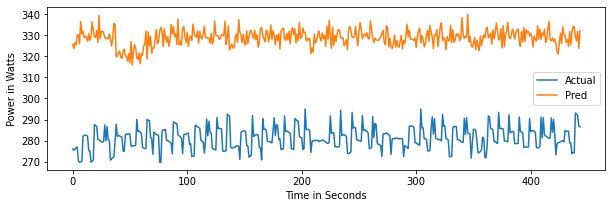

Linear Regression
Mean absolute error: 48.87
Mean absolute percentage error: 17.42
Standard deviation of test set: 5.29


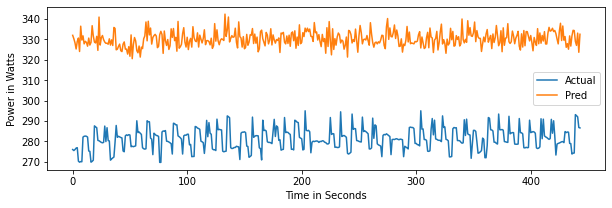

Decision Tree
Mean absolute error: 26.86
Mean absolute percentage error: 9.55
Standard deviation of test set: 5.29


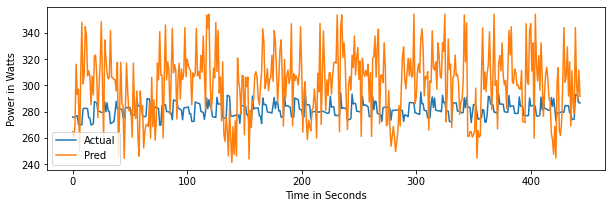

Random Forest
Mean absolute error: 16.95
Mean absolute percentage error: 6.04
Standard deviation of test set: 5.29


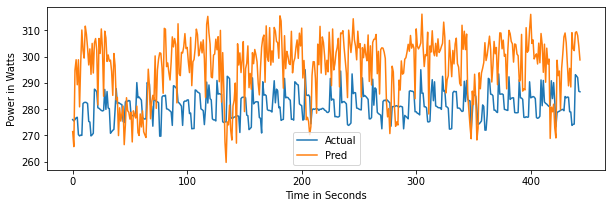

SVR
Mean absolute error: 47.03
Mean absolute percentage error: 16.68
Standard deviation of test set: 5.29


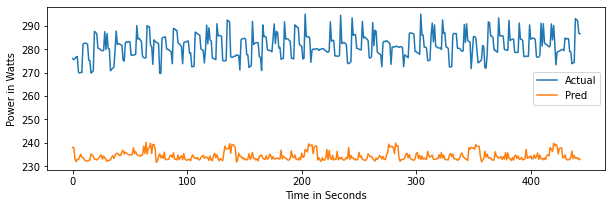

XGBoost
Mean absolute error: 10.69
Mean absolute percentage error: 3.82
Standard deviation of test set: 5.29


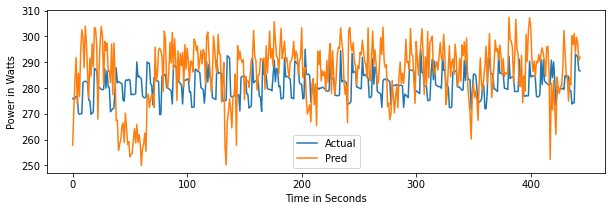

Lasso
Mean absolute error: 49.2
Mean absolute percentage error: 17.53
Standard deviation of test set: 5.29


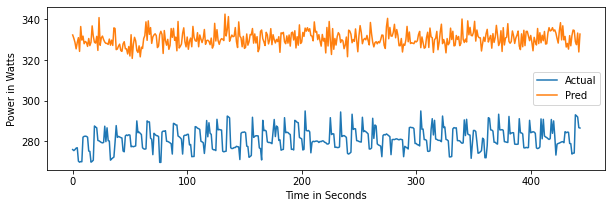

exp2multi4app
NN
Mean absolute error: 46.61
Mean absolute percentage error: 17.12
Standard deviation of test set: 5.61


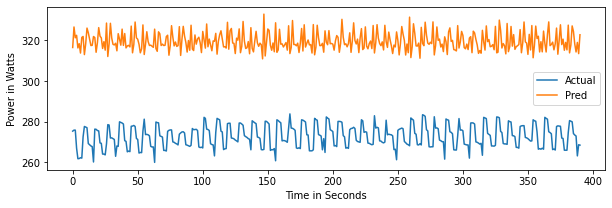

Linear Regression
Mean absolute error: 53.8
Mean absolute percentage error: 19.76
Standard deviation of test set: 5.61


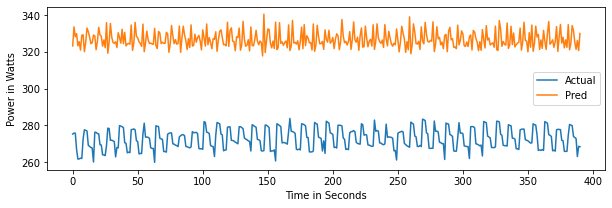

Decision Tree
Mean absolute error: 16.31
Mean absolute percentage error: 5.95
Standard deviation of test set: 5.61


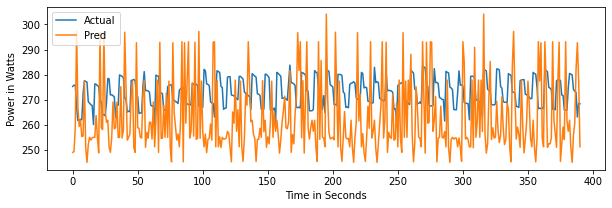

Random Forest
Mean absolute error: 7.66
Mean absolute percentage error: 2.83
Standard deviation of test set: 5.61


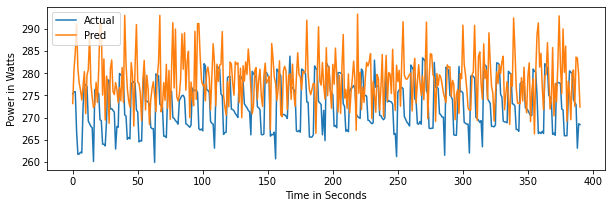

SVR
Mean absolute error: 53.12
Mean absolute percentage error: 19.44
Standard deviation of test set: 5.61


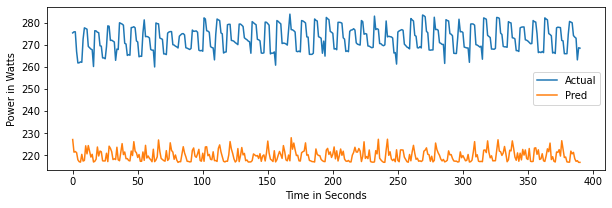

XGBoost
Mean absolute error: 14.62
Mean absolute percentage error: 5.32
Standard deviation of test set: 5.61


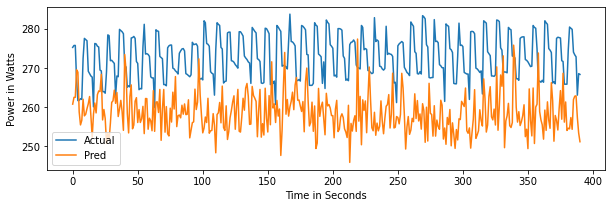

Lasso
Mean absolute error: 54.11
Mean absolute percentage error: 19.87
Standard deviation of test set: 5.61


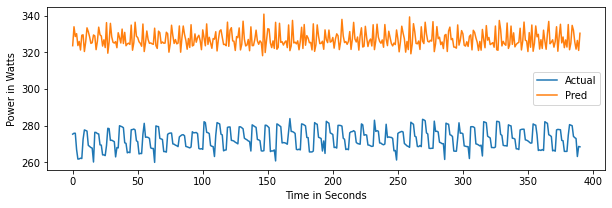

exp3multi4app
NN
Mean absolute error: 50.13
Mean absolute percentage error: 19.59
Standard deviation of test set: 5.67


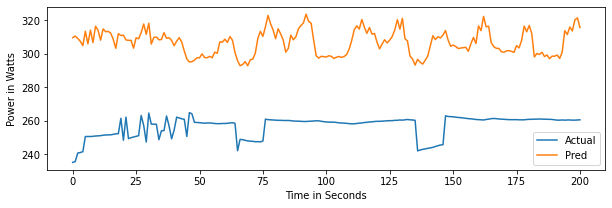

Linear Regression
Mean absolute error: 69.53
Mean absolute percentage error: 27.15
Standard deviation of test set: 5.67


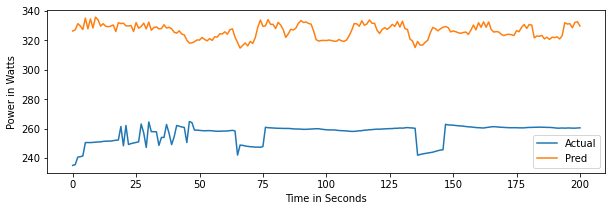

Decision Tree
Mean absolute error: 16.01
Mean absolute percentage error: 6.26
Standard deviation of test set: 5.67


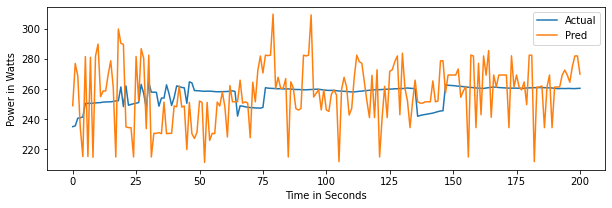

Random Forest
Mean absolute error: 19.77
Mean absolute percentage error: 7.74
Standard deviation of test set: 5.67


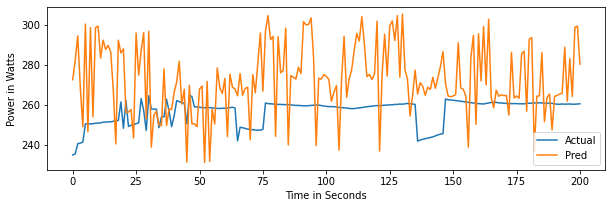

SVR
Mean absolute error: 13.04
Mean absolute percentage error: 5.04
Standard deviation of test set: 5.67


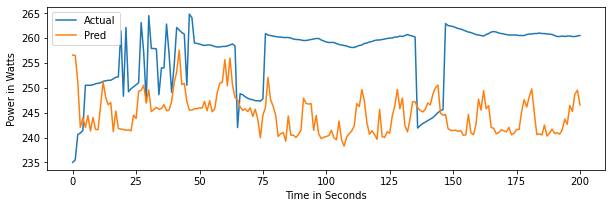

XGBoost
Mean absolute error: 13.0
Mean absolute percentage error: 5.06
Standard deviation of test set: 5.67


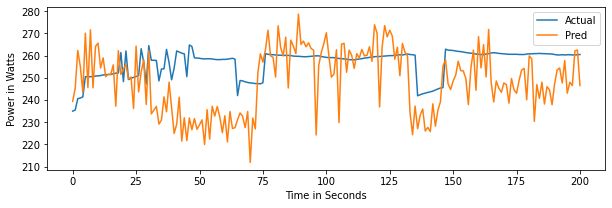

Lasso
Mean absolute error: 69.93
Mean absolute percentage error: 27.31
Standard deviation of test set: 5.67


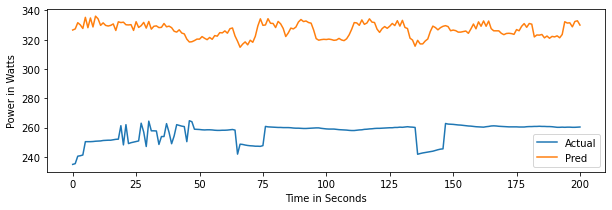

exp4multi4app
NN
Mean absolute error: 25.58
Mean absolute percentage error: 9.64
Standard deviation of test set: 10.51


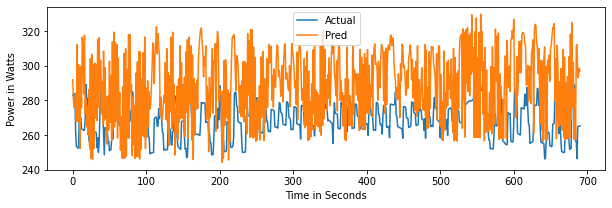

Linear Regression
Mean absolute error: 63.08
Mean absolute percentage error: 23.69
Standard deviation of test set: 10.51


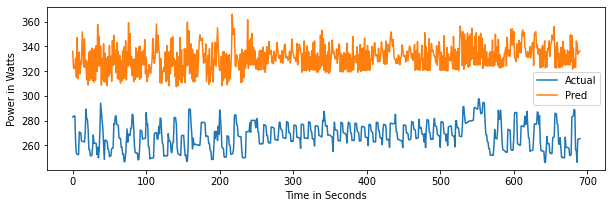

Decision Tree
Mean absolute error: 22.6
Mean absolute percentage error: 8.4
Standard deviation of test set: 10.51


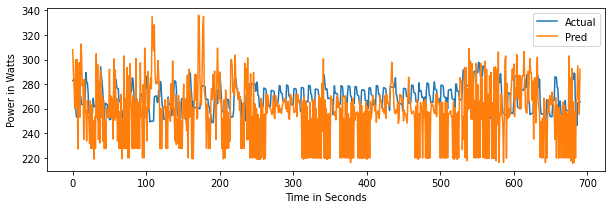

Random Forest
Mean absolute error: 21.74
Mean absolute percentage error: 8.07
Standard deviation of test set: 10.51


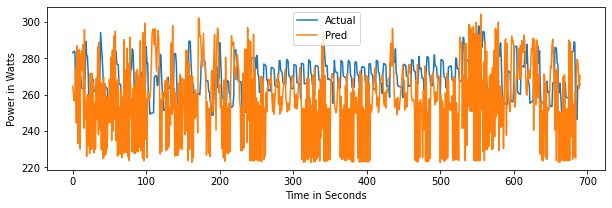

SVR
Mean absolute error: 41.41
Mean absolute percentage error: 15.31
Standard deviation of test set: 10.51


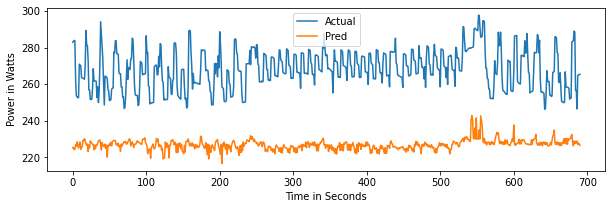

XGBoost
Mean absolute error: 28.42
Mean absolute percentage error: 10.52
Standard deviation of test set: 10.51


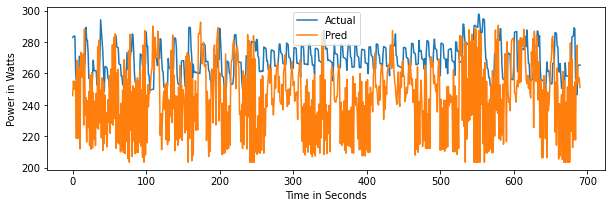

Lasso
Mean absolute error: 63.2
Mean absolute percentage error: 23.74
Standard deviation of test set: 10.51


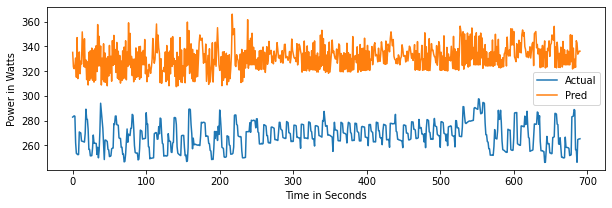

exp5multi4app
NN
Mean absolute error: 78.15
Mean absolute percentage error: 31.06
Standard deviation of test set: 9.07


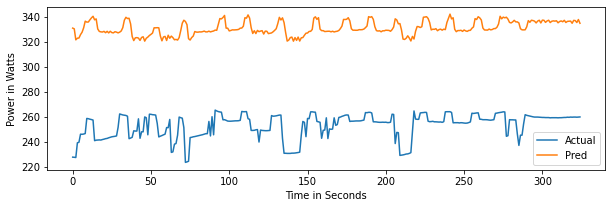

Linear Regression
Mean absolute error: 90.0
Mean absolute percentage error: 35.76
Standard deviation of test set: 9.07


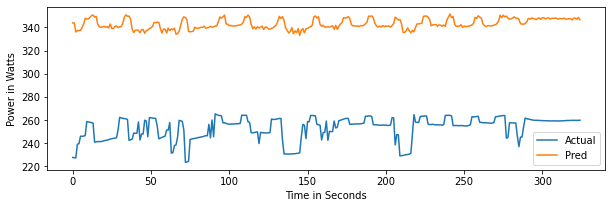

Decision Tree
Mean absolute error: 94.53
Mean absolute percentage error: 37.41
Standard deviation of test set: 9.07


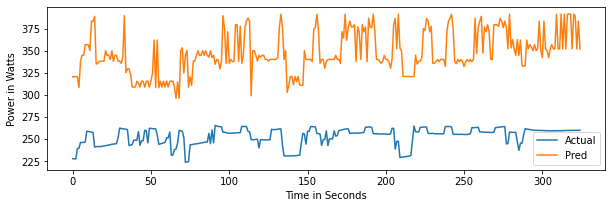

Random Forest
Mean absolute error: 67.47
Mean absolute percentage error: 26.74
Standard deviation of test set: 9.07


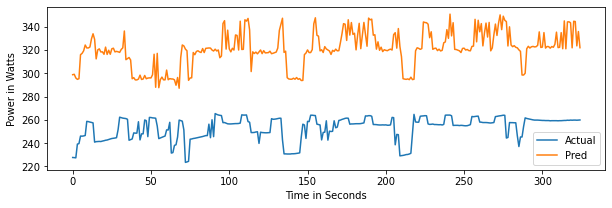

SVR
Mean absolute error: 9.26
Mean absolute percentage error: 3.81
Standard deviation of test set: 9.07


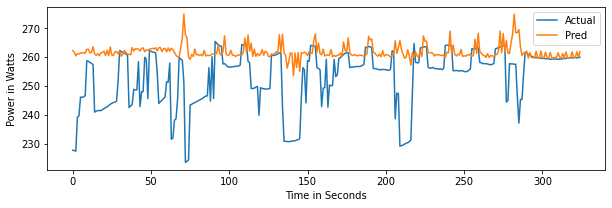

XGBoost
Mean absolute error: 66.72
Mean absolute percentage error: 26.48
Standard deviation of test set: 9.07


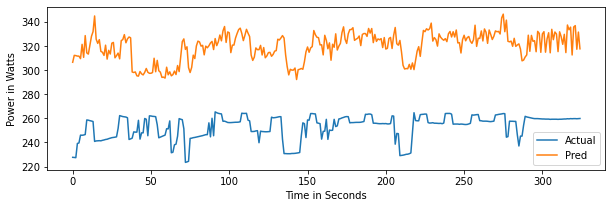

Lasso
Mean absolute error: 90.84
Mean absolute percentage error: 36.1
Standard deviation of test set: 9.07


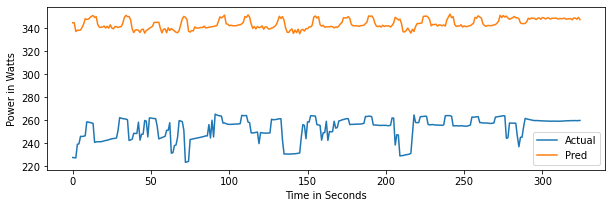

In [23]:
# test  = ['exp7app','exp8app','exp10app','exp11app','exp12app','exp13app','exp14app','exp15app','exp16app','exp17app']
# test  = ['exp12app']
# test  = ['exp7','exp8','exp10','exp11','exp12','exp13','exp14', 'exp15', 'exp16', 'exp17']
# test = ['exp5multiapp', 'exp6multiapp']
test = ['exp1multi4app', 'exp2multi4app', 'exp3multi4app', 'exp4multi4app', 'exp5multi4app']
res = {}
p_flag = True
# svr_i = 106
# beta_0 = 100
print("svr intercept:", svr_i)
df_idle = pd.read_csv("datasets/final-idlerun.csv")
df_idle = df_idle.loc[:, ~df_idle.columns.str.contains('^Unnamed')]
p_idle = np.mean(df_idle.power)
avg_pow = {}
for t in test:
    print(t)
    models = ['NN', 'Linear Regression', 'Decision Tree', 'Random Forest', 'SVR', 'XGBoost', 'Lasso']
#     models = ['Linear Regression', 'Random Forest', 'SVR']
#     models = ['SVR']
    results = {}
    oldY=df_t[t].power
    std_Y=np.std(df_t[t].power)
    avg_pow[t] = np.max(df_t[t].power)
    for m in models:
#         l = min(len(preds_1[t+'1'][m]), len(preds_2[t+'2'][m]))
#     #     print(l)
# #         l = len(preds_1[t][m])
# #         l = 1100
#         p1 = preds_1[t+'1'][m][:l]
#         p2 = preds_2[t+'2'][m][:l]
# #         total_pred = (p1 + p_idle)
#         total_pred = (p1+p2) if p_flag == False else (p1 + p2 + p_idle)
# #         total_pred -= p_idle
#         if m == 'SVR':
#             total_pred -= svr_i
#         else:
#             total_pred -= beta_0[t]
        l = min(len(preds_1[t+'1'][m]), len(preds_2[t+'2'][m]))
        l = min(l, len(preds_3[t+'3'][m]))
        l = min(l, len(preds_4[t+'4'][m]))
    #     print(l)
#         l = len(preds_1[t][m])
        p1 = preds_1[t+'1'][m][:l]
        p2 = preds_2[t+'2'][m][:l]
        p3 = preds_3[t+'3'][m][:l]
        p4 = preds_4[t+'4'][m][:l]
#         total_pred = (p1) + 117
        total_pred = (p1+p2+p3+p4) if p_flag == False else (p1 + p2 + p3 + p4 + 117)
        if m == 'SVR':
            total_pred -= 3 * svr_i[0]
        else:
            total_pred -= 3* beta_0[t][0]/beta_0[t][0] * 117
        mae = mean_absolute_error(oldY[:l], total_pred)
        mape = mean_absolute_percentage_error(oldY[:l], total_pred)
        mae = round(mae, 2)
        mape = round((mape*100), 2)
        std_Y = round(std_Y, 2)
        print(m)
        print("Mean absolute error:", mae)
        print("Mean absolute percentage error:", mape)
        print("Standard deviation of test set:", std_Y)
        # add results to dictionary
        results[m] = [mae, mape, std_Y]
        df_plot = pd.DataFrame({'Actual': oldY[:l], 'Pred': total_pred})
        plt.figure(figsize=(10, 3))
        plt.plot(df_plot)
        plt.legend(df_plot.columns)
        plt.ylabel("Power in Watts")
        plt.xlabel("Time in Seconds")
        plt.show()

    results_df = pd.DataFrame(results, index=['MAE', 'MAPE', 'STD'])
    res[t] = results_df

In [17]:
preds_4


{'exp1multi4app3': {'NN': array([141.90217531, 141.89170862, 141.73126712, 141.77948007,
         141.56922467, 141.94826276, 141.61753549, 141.73710383,
         141.73683392, 141.84047254, 141.74246213, 141.68131444,
         141.66396842, 141.69826915, 141.72576488, 141.66616297,
         141.60544697, 141.69395947, 141.67822627, 141.80366674,
         141.74179249, 141.74573948, 141.61114562, 141.88467989,
         141.58724216, 141.67466722, 141.71366822, 141.62576854,
         141.75376143, 141.81815804, 141.83788174, 141.72176339,
         141.82398721, 141.65700849, 141.88806761, 141.63607818,
         141.82288206, 141.78891269, 141.70902066, 141.66560802,
         141.72345661, 141.82051976, 141.67399891, 141.60954606,
         141.65159447, 141.66053082, 141.60074913, 141.77863341,
         141.72845742, 141.71326481, 141.68885386, 141.91309467,
         141.57895171, 141.66891758, 141.81488342, 141.82776417,
         141.72346044, 141.69493789, 141.74838131, 141.77394094,
 

In [22]:
beta_0

{'exp1multi4app': array([146.04662259]),
 'exp2multi4app': array([148.49228741]),
 'exp3multi4app': array([152.00362758]),
 'exp4multi4app': array([149.84979478]),
 'exp5multi4app': array([153.19101477])}

In [24]:
for t in test:
    print(t)
    results_df = res[t]
    for i, row in results_df.T.iterrows():
        print(row['MAE'])
        print(row['MAPE'])
        print(row['STD'])
        print(0)

exp1multi4app
47.43
16.9
5.29
0
48.87
17.42
5.29
0
26.86
9.55
5.29
0
16.95
6.04
5.29
0
47.03
16.68
5.29
0
10.69
3.82
5.29
0
49.2
17.53
5.29
0
exp2multi4app
46.61
17.12
5.61
0
53.8
19.76
5.61
0
16.31
5.95
5.61
0
7.66
2.83
5.61
0
53.12
19.44
5.61
0
14.62
5.32
5.61
0
54.11
19.87
5.61
0
exp3multi4app
50.13
19.59
5.67
0
69.53
27.15
5.67
0
16.01
6.26
5.67
0
19.77
7.74
5.67
0
13.04
5.04
5.67
0
13.0
5.06
5.67
0
69.93
27.31
5.67
0
exp4multi4app
25.58
9.64
10.51
0
63.08
23.69
10.51
0
22.6
8.4
10.51
0
21.74
8.07
10.51
0
41.41
15.31
10.51
0
28.42
10.52
10.51
0
63.2
23.74
10.51
0
exp5multi4app
78.15
31.06
9.07
0
90.0
35.76
9.07
0
94.53
37.41
9.07
0
67.47
26.74
9.07
0
9.26
3.81
9.07
0
66.72
26.48
9.07
0
90.84
36.1
9.07
0


In [141]:
df_t


{'exp1multiapp':      LLC-load-misses     LLC-loads  LLC-store-misses    LLC-stores  \
 0       5.600620e+06  1.708968e+08      2.474760e+06  2.790122e+07   
 1       2.495843e+07  5.768147e+08      9.421828e+06  9.882842e+07   
 2       8.585907e+07  1.445806e+09      2.859887e+07  2.564680e+08   
 3       4.551725e+07  6.945240e+08      1.488248e+07  1.274850e+08   
 4       4.746094e+07  8.948572e+08      1.545597e+07  1.571380e+08   
 ..               ...           ...               ...           ...   
 785     4.712108e+07  6.923488e+08      2.640581e+07  1.382499e+08   
 786     3.317543e+07  6.389972e+08      2.460925e+07  1.285047e+08   
 787     3.755820e+07  7.333415e+08      2.850119e+07  1.464756e+08   
 788     5.033878e+07  7.634131e+08      2.980121e+07  1.545341e+08   
 789     3.280896e+07  6.853975e+08      2.435827e+07  1.393320e+08   
 
           blocks         bytes        cycles  instructions    ref-cycles  \
 0   -3815.862347 -1.953722e+06  3.633465e+10  1.4972

In [142]:
avg_pow

{'exp1multiapp': 292.0,
 'exp2multiapp': 311.7,
 'exp3multiapp': 298.6,
 'exp4multiapp': 268.7,
 'exp5multiapp': 257.1,
 'exp6multiapp': 270.6}

In [143]:
df_train.power -= p_idle
oldY=df_test.power
std_=np.std(df_test.power)
mean_=np.mean(df_test.power)
oldY

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
sc_X = ss.fit_transform(df_train)
sc_X = pd.DataFrame(data=sc_X)
ss = StandardScaler()
sc_Y = ss.fit_transform(df_test)
# sc_Y = ss.transform(df_test)
sc_Y = pd.DataFrame(data=sc_Y)

std = np.std(sc_Y[11])

# X2 = df_test.iloc[:, :-1].values
# y2 = df_test.iloc[:, -1:].values

colNames = ["LLC-load-misses", "LLC-loads", "LLC-store-misses", "LLC-stores", "blocks", "bytes", "cycles", "instructions", "ref-cycles", "pkg_pwr", "ram_pwr", "power"]

def destandardize(data):
#     dummy = pd.DataFrame(np.zeros((len(data), 12)), columns=colNames)
#     dummy["power"] = data
#     dummy = pd.DataFrame(ss.inverse_transform(dummy), columns=colNames)
#     return dummy["power"].values
    newVar=data*std_+mean_
    return newVar

In [144]:
X1 = df_train.iloc[:, :-3].values
# y1 = sc_X.iloc[:, -1:].values
y1 = df_train.iloc[:, -1:].values
X2 = df_test.iloc[:, :-3].values
y2 = df_test.iloc[:, -1:].values

# X1 = sc_X.iloc[:, :-3].values
# # y1 = sc_X.iloc[:, -1:].values
# y1 = sc_X.iloc[:, -1:].values
# X2 = sc_Y.iloc[:, :-3].values
# y2 = sc_Y.iloc[:, -1:].values

print(X2)

results2 = {}
preds1 = {}

model = MLPRegressor(hidden_layer_sizes= (512,16,16,),learning_rate='constant', alpha= 0.0001, learning_rate_init= 0.1, max_iter= 10000, activation= 'relu')
model.fit(X1, y1)
y_pred = model.predict(X2)
# y_pred=destandardize(y_pred)
preds1['NN'] = y_pred.flatten()

model = LinearRegression(fit_intercept=False)
model.fit(X1, y1)
beta0 = model.intercept_
y_pred = model.predict(X2)
print(y_pred)
# y_pred=destandardize(y_pred)
preds1['Linear Regression'] = y_pred.flatten()

model = DecisionTreeRegressor()
model.fit(X1, y1)
y_pred = model.predict(X2)
# y_pred=destandardize(y_pred)
preds1['Decision Tree'] = y_pred.flatten()

model = RandomForestRegressor()
model.fit(X1, y1)
y_pred = model.predict(X2)
# y_pred=destandardize(y_pred)
preds1['Random Forest'] = y_pred.flatten()
 
model = SVR()
model.fit(X1, y1)
y_pred = model.predict(X2)
# y_pred=destandardize(y_pred)
preds1['SVR'] = y_pred.flatten()

model = XGBRegressor(n_estimators=1000,max_depth=3,eta=0.001)
model.fit(X1, y1)
y_pred = model.predict(X2)
# y_pred=destandardize(y_pred)
preds1['XGBoost'] = y_pred.flatten()

model = Lasso(alpha=0.1)
model.fit(X1, y1)
y_pred = model.predict(X2)
# y_pred=destandardize(y_pred)
preds1['Lasso'] = y_pred.flatten()


[[2.47828924e+07 3.16480216e+08 1.07891438e+07 ... 4.54254129e+10
  4.15036432e+10 4.65537596e+10]
 [2.71731594e+07 3.22398824e+08 1.20299138e+07 ... 4.74853153e+10
  4.25143958e+10 4.77648023e+10]
 [3.53491064e+07 4.20181496e+08 1.41622878e+07 ... 6.36166399e+10
  5.92527894e+10 6.44494067e+10]
 ...
 [1.00120246e+08 1.11861960e+09 6.71851458e+07 ... 3.33184980e+11
  1.18623874e+11 3.35822864e+11]
 [1.00038598e+08 1.12092900e+09 6.71264198e+07 ... 3.30416444e+11
  1.17749855e+11 3.33027763e+11]
 [1.21386540e+08 1.36771125e+09 8.16444298e+07 ... 4.00869945e+11
  1.43984651e+11 4.04077191e+11]]


/Users/joyboy/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[ 4.83490802e+00]
 [-1.82434653e+00]
 [ 4.89410638e+00]
 [ 2.35368872e+00]
 [-1.29865956e+00]
 [ 1.20248328e+01]
 [ 8.10384634e+00]
 [-2.19758753e-01]
 [ 5.41981428e+00]
 [ 4.14651880e+01]
 [ 8.51515470e+01]
 [ 1.10887654e+02]
 [ 8.08680944e+01]
 [ 9.00693678e+01]
 [ 8.54179309e+01]
 [ 8.02766648e+01]
 [ 9.60488058e+01]
 [ 8.39482642e+01]
 [ 7.97626787e+01]
 [ 9.01371021e+01]
 [ 1.00110484e+02]
 [ 9.04689609e+01]
 [ 8.89064544e+01]
 [ 1.18168640e+02]
 [ 8.93642844e+01]
 [ 1.10911722e+02]
 [ 9.07514476e+01]
 [ 1.02868743e+02]
 [ 1.29970404e+02]
 [ 1.10719113e+02]
 [ 1.05769093e+02]
 [ 1.25451765e+02]
 [ 8.01478839e+01]
 [ 1.14961084e+02]
 [ 1.10124046e+02]
 [ 1.41988300e+02]
 [ 9.67722354e+01]
 [ 9.83932553e+01]
 [ 1.19454080e+02]
 [ 9.10736555e+01]
 [ 1.02004559e+02]
 [ 1.06733135e+02]
 [ 1.20181949e+02]
 [ 9.14600597e+01]
 [ 9.93581797e+01]
 [ 9.42428851e+01]
 [ 1.02023452e+02]
 [ 1.34734105e+02]
 [ 1.13364705e+02]
 [ 9.36939502e+01]
 [ 1.19022522e+02]
 [ 9.36014976e+01]
 [ 1.0521979

/var/folders/d7/qtwn8x393s907c0ztnpz3k7w0000gn/T/ipykernel_76430/1687030618.py:39: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X1, y1)
/Users/joyboy/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/joyboy/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.203e+06, tolerance: 1.236e+03
  model = cd_fast.enet_coordinate_descent(


In [145]:
# trainset = ['manual_mc1', 'manual_tf3', 'manual_mnn1', 'manual_sys1', 'manual_stress2', 'user7zip', 'usercp2k', 'usercrypto', 'usergzip', 'userstream2', 'userfio', 'userramspeed', 'usertinymemb', 'userlinux', 'idle']
# trainset = ['mc', 'mc2', 'tf', 'mnn', 'mnn-2', 'sys', 'sys-2', 'stress', '7zip', 'cp2k', 'crypto', 'gzip', 'stream', 'fio', 'leveldb', 'mbw', 'ramspeedsmp', 'tinymemb', 'litesql', 'lkernel', 'filebench_all', 'ycsbmongo_all2', 'syscpu', 'sysmem', 'idle']
trainset = ['exp1','exp2','exp3','exp4','exp5','exp6','exp7app1','exp7app2','exp8app1','exp8app2','exp9app1','exp9app2']
testset = ['exp9app2']
ignoreset = ['filebench_all', 'ycsbmongo_all2',]
# ignoreset = ['mc', 'tf', 'mnn', 'mnn-2', 'sys', 'sys-2', 'stress']
# ignoreset = ['exp1','exp2','exp3','exp4','exp5','exp6']
alwaysignore = ['exp7app1','exp7app2','exp8app1','exp8app2','exp9app1','exp9app2']
# alwaysignore = ['7zip', 'cp2k', 'crypto', 'gzip', 'stream', 'fio', 'leveldb', 'mbw', 'ramspeedsmp', 'tinymemb', 'litesql', 'lkernel', 'syscpu', 'sysmem', 'mc2', 'idle']
df_train = pd.DataFrame()
# df_train = df_all[trainset[0]]
# print(trainset[0], "included in training set")
for t in trainset:
    if t in testset or t in ignoreset or t in alwaysignore:
        continue
    df_train = df_train.append(df_all[t], ignore_index=True)
    print(t, "included in training set")

df_test = pd.DataFrame()
for t in testset:
    df_test = df_test.append(df_all[t], ignore_index=True)
    print(t, "included in testing set")

exp1 included in training set
exp2 included in training set
exp3 included in training set
exp4 included in training set
exp5 included in training set
exp6 included in training set
exp9app2 included in testing set


/var/folders/d7/qtwn8x393s907c0ztnpz3k7w0000gn/T/ipykernel_76430/3073984111.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_all[t], ignore_index=True)
/var/folders/d7/qtwn8x393s907c0ztnpz3k7w0000gn/T/ipykernel_76430/3073984111.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(df_all[t], ignore_index=True)


In [146]:
df_train.power -= p_idle
oldY=df_test.power
std_=np.std(df_test.power)
mean_=np.mean(df_test.power)
oldY

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
sc_X = ss.fit_transform(df_train)
sc_X = pd.DataFrame(data=sc_X)
ss = StandardScaler()
sc_Y = ss.fit_transform(df_test)
# sc_Y = ss.transform(df_test) # app1 or app2
sc_Y = pd.DataFrame(data=sc_Y)

std = np.std(sc_Y[11])

# X2 = df_test.iloc[:, :-1].values
# y2 = df_test.iloc[:, -1:].values

colNames = ["LLC-load-misses", "LLC-loads", "LLC-store-misses", "LLC-stores", "blocks", "bytes", "cycles", "instructions", "ref-cycles", "pkg_pwr", "ram_pwr", "power"]

def destandardize(data):
#     dummy = pd.DataFrame(np.zeros((len(data), 12)), columns=colNames)
#     dummy["power"] = data
#     dummy = pd.DataFrame(ss.inverse_transform(dummy), columns=colNames)
#     return dummy["power"].values
    newVar=var*std_+mean_
    return newVar

In [147]:
X1 = df_train.iloc[:, :-3].values
# y1 = sc_X.iloc[:, -1:].values
y1 = df_train.iloc[:, -1:].values
X2 = df_test.iloc[:, :-3].values
y2 = df_test.iloc[:, -1:].values

# X1 = sc_X.iloc[:, :-3].values
# # y1 = sc_X.iloc[:, -1:].values
# y1 = sc_X.iloc[:, -1:].values
# X2 = sc_Y.iloc[:, :-3].values
# y2 = sc_Y.iloc[:, -1:].values

print(X2)

results2 = {}
preds2 = {}

model = MLPRegressor(hidden_layer_sizes= (512,16,16,),learning_rate='constant', alpha= 0.0001, learning_rate_init= 0.1, max_iter= 10000, activation= 'relu')
model.fit(X1, y1)
y_pred = model.predict(X2)
# y_pred=destandardize(y_pred)
preds2['NN'] = y_pred.flatten()

model = LinearRegression(fit_intercept=True)
model.fit(X1, y1)
y_pred = model.predict(X2)
print(y_pred)
# y_pred=destandardize(y_pred)
preds2['Linear Regression'] = y_pred.flatten()

model = DecisionTreeRegressor()
model.fit(X1, y1)
y_pred = model.predict(X2)
# y_pred=destandardize(y_pred)
preds2['Decision Tree'] = y_pred.flatten()

model = RandomForestRegressor()
model.fit(X1, y1)
y_pred = model.predict(X2)
# y_pred=destandardize(y_pred)
preds2['Random Forest'] = y_pred.flatten()
 
model = SVR()
model.fit(X1, y1)
y_pred = model.predict(X2)
# y_pred=destandardize(y_pred)
preds2['SVR'] = y_pred.flatten()

model = XGBRegressor(n_estimators=1000,max_depth=3,eta=0.001)
model.fit(X1, y1)
y_pred = model.predict(X2)
# y_pred=destandardize(y_pred)
preds2['XGBoost'] = y_pred.flatten()

model = Lasso(alpha=0.1)
model.fit(X1, y1)
y_pred = model.predict(X2)
# y_pred=destandardize(y_pred)
preds2['Lasso'] = y_pred.flatten()


/Users/joyboy/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[     108427     3237996        6858 ...  1327593729  1589078762
   1309564416]
 [     464280     9146414       94814 ...  5543587419  6292137803
   4844784694]
 [      95593     4788731       35756 ...  2316414415  3326242887
   3307996945]
 ...
 [     702165    31433543      201677 ... 25449486740 18168601921
  25050444036]
 [     703944     9307402      777743 ... 21170227445 23196849873
  21182875751]
 [     639349    20148790      171010 ... 16088114489 19044862770
  16121610273]]
[[68.66706645]
 [72.02795077]
 [71.97424459]
 [72.58873495]
 [69.60464687]
 [70.50254243]
 [72.41515105]
 [77.20289736]
 [79.72896154]
 [81.72780109]
 [77.51995891]
 [77.59325323]
 [70.47582292]
 [72.51457559]
 [72.70825021]
 [69.61450104]
 [72.44441206]
 [72.88657712]
 [72.73037961]
 [73.4110533 ]
 [69.44221563]
 [71.25040065]
 [70.5436468 ]
 [71.69249289]
 [71.63386813]
 [70.13367157]
 [70.39817222]
 [71.59759461]
 [71.88736918]
 [71.42574605]
 [71.09618377]
 [71.95493469]
 [73.55880921]
 [71.17472284

/var/folders/d7/qtwn8x393s907c0ztnpz3k7w0000gn/T/ipykernel_76430/2611923695.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X1, y1)
/Users/joyboy/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/joyboy/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.202e+05, tolerance: 1.094e+03
  model = cd_fast.enet_coordinate_descent(


In [148]:
df_t

{'exp1multiapp':      LLC-load-misses     LLC-loads  LLC-store-misses    LLC-stores  \
 0       5.600620e+06  1.708968e+08      2.474760e+06  2.790122e+07   
 1       2.495843e+07  5.768147e+08      9.421828e+06  9.882842e+07   
 2       8.585907e+07  1.445806e+09      2.859887e+07  2.564680e+08   
 3       4.551725e+07  6.945240e+08      1.488248e+07  1.274850e+08   
 4       4.746094e+07  8.948572e+08      1.545597e+07  1.571380e+08   
 ..               ...           ...               ...           ...   
 785     4.712108e+07  6.923488e+08      2.640581e+07  1.382499e+08   
 786     3.317543e+07  6.389972e+08      2.460925e+07  1.285047e+08   
 787     3.755820e+07  7.333415e+08      2.850119e+07  1.464756e+08   
 788     5.033878e+07  7.634131e+08      2.980121e+07  1.545341e+08   
 789     3.280896e+07  6.853975e+08      2.435827e+07  1.393320e+08   
 
           blocks         bytes        cycles  instructions    ref-cycles  \
 0   -3815.862347 -1.953722e+06  3.633465e+10  1.4972

In [149]:
print('MAPE:')
for i, row in results_df.T.iterrows():
    print(i + ' ' +  str(row['MAPE']) + '%')

MAPE:
NN 109.33%
Linear Regression 275.69%
Decision Tree 75.97%
Random Forest 63.38%
SVR 15.28%
XGBoost 68.0%
Lasso 273.14%


In [150]:
preds1['NN']

array([-1.41532284, -1.41532284, -1.41532284, -1.41532284, -1.41532284,
       -1.41532284, -1.41532284, -1.41532284, -1.41532284, -1.41532284,
       -1.41532284, -1.41532284, -1.41532284, -1.41532284, -1.41532284,
       -1.41532284, -1.41532284, -1.41532284, -1.41532284, -1.41532284,
       -1.41532284, -1.41532284, -1.41532284, -1.41532284, -1.41532284,
       -1.41532284, -1.41532284, -1.41532284, -1.41532284, -1.41532284,
       -1.41532284, -1.41532284, -1.41532284, -1.41532284, -1.41532284,
       -1.41532284, -1.41532284, -1.41532284, -1.41532284, -1.41532284,
       -1.41532284, -1.41532284, -1.41532284, -1.41532284, -1.41532284,
       -1.41532284, -1.41532284, -1.41532284, -1.41532284, -1.41532284,
       -1.41532284, -1.41532284, -1.41532284, -1.41532284, -1.41532284,
       -1.41532284, -1.41532284, -1.41532284, -1.41532284, -1.41532284,
       -1.41532284, -1.41532284, -1.41532284, -1.41532284, -1.41532284,
       -1.41532284, -1.41532284, -1.41532284, -1.41532284, -1.41

In [151]:
preds2['NN']

array([-339.33913901, -339.33913901, -339.33913901, -339.33913901,
       -339.33913901, -339.33913901, -339.33913901, -339.33913901,
       -339.33913901, -339.33913901, -339.33913901, -339.33913901,
       -339.33913901, -339.33913901, -339.33913901, -339.33913901,
       -339.33913901, -339.33913901, -339.33913901, -339.33913901,
       -339.33913901, -339.33913901, -339.33913901, -339.33913901,
       -339.33913901, -339.33913901, -339.33913901, -339.33913901,
       -339.33913901, -339.33913901, -339.33913901, -339.33913901,
       -339.33913901, -339.33913901, -339.33913901, -339.33913901,
       -339.33913901, -339.33913901, -339.33913901, -339.33913901,
       -339.33913901, -339.33913901, -339.33913901, -339.33913901,
       -339.33913901, -339.33913901, -339.33913901, -339.33913901,
       -339.33913901, -339.33913901, -339.33913901, -339.33913901,
       -339.33913901, -339.33913901, -339.33913901, -339.33913901,
       -339.33913901, -339.33913901, -339.33913901, -339.33913

In [152]:
preds1['Linear Regression'][:l] + preds2['Linear Regression'][:l]

array([ 73.50197447,  70.20360424,  76.86835097,  74.94242367,
        68.30598731,  82.52737528,  80.51899739,  76.98313861,
        85.14877582, 123.19298909, 162.67150589, 188.48090727,
       151.34391735, 162.5839434 , 158.12618113, 149.89116585,
       168.49321784, 156.83484133, 152.49305832, 163.5481554 ,
       169.5527    , 161.71936155, 159.45010121, 189.86113312,
       160.99815248, 181.04539371, 161.14961983, 174.46633726,
       201.85777298, 182.14485907, 176.86527681, 197.40669932,
       153.70669315, 186.13580699, 181.59931749, 211.2828309 ,
       167.35407848, 168.55749743, 192.720702  , 161.41876316,
       171.94966593, 178.57870809, 200.72498422, 169.54246861,
       182.50913573, 170.0366824 , 182.97151086, 210.17028705,
       194.96027697, 174.84811878, 199.98808058, 168.47987216,
       186.0727319 , 182.77598472, 216.07098025, 175.51159109,
       189.45875323, 190.98293404, 218.76001308, 186.33041294,
       181.95249266, 216.96824751, 186.42695815, 182.28

In [153]:
y_pred

array([68.73557543, 73.27709356, 70.29333705, 72.26386525, 69.28587105,
       72.47077381, 70.83404007, 77.07378807, 79.88639151, 82.34262479,
       76.61098213, 77.18628133, 70.59930509, 72.12711043, 71.19410693,
       70.32387637, 72.69172249, 72.45277285, 71.9948066 , 72.23939833,
       69.28144189, 71.55676598, 69.98446669, 71.35282284, 71.51993097,
       70.29648143, 70.26182843, 72.01516346, 71.70227998, 71.06937177,
       71.3221485 , 72.04640389, 73.399743  , 70.61135698, 71.71213171,
       69.70487536, 70.60137209, 70.47597493, 73.35031652, 70.26030135,
       69.86958909, 71.94446531, 79.83710981, 78.75453632, 83.52881588,
       75.8962213 , 81.22012829, 75.59094871, 81.22630248, 80.46080302,
       81.78999376, 74.89947724, 80.33738766, 72.55524233, 73.82040146,
       73.49690478, 74.33294966, 77.13849319, 74.48594076, 72.22528695,
       72.75226547, 74.15996875, 72.29523911, 73.13316235, 73.59819682,
       73.44141551, 75.49627869, 76.63082706, 73.50945227, 73.01

In [154]:



results = {}


model = MLPRegressor(hidden_layer_sizes= (512,16,16,),learning_rate='constant', alpha= 0.0001, learning_rate_init= 0.1, max_iter= 10000, activation= 'relu')
model.fit(X1, y1)
y_pred = model.predict(X2)

y_pred=destandardize(y_pred)

mae = mean_absolute_error(oldY, y_pred)
mape = mean_absolute_percentage_error(oldY, y_pred)
mae = round(mae, 2)
mape = round((mape*100), 2)
std_ = round(std_, 2)
print(model)
print("Mean absolute error:", mae)
print("Mean absolute percentage error:", mape)
print("Standard deviation of test set:", std_)
# add results to dictionary
results['NN'] = [mae, mape, std_]
df_plot = pd.DataFrame({'Actual': oldY, 'Pred': y_pred.flatten()})
plt.figure(figsize=(10, 3))
plt.plot(df_plot)
plt.legend(df_plot.columns)
plt.ylabel("Power in Watts")
plt.xlabel("Time in Seconds")
plt.show()



model = LinearRegression(fit_intercept=True)
model.fit(X1, y1)
y_pred = model.predict(X2)
y_pred=destandardize(y_pred)

mae = mean_absolute_error(oldY, y_pred)
mape = mean_absolute_percentage_error(oldY, y_pred)
mae = round(mae, 2)
mape = round((mape*100), 2)
std_ = round(std_, 2)
print(model)
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)
print("Mean absolute error:", mae)
print("Mean absolute percentage error:", mape)
print("Standard deviation of test set:", std_)
# add results to dictionary
results['Linear Regression'] = [mae, mape, std_]
df_plot = pd.DataFrame({'Actual': oldY, 'Pred': y_pred.flatten()})
plt.figure(figsize=(10, 3))
plt.plot(df_plot)
plt.legend(df_plot.columns)
plt.ylabel("Power in Watts")
plt.xlabel("Time in Seconds")
plt.show()



model = DecisionTreeRegressor()
model.fit(X1, y1)
y_pred = model.predict(X2)
y_pred=destandardize(y_pred)

mae = mean_absolute_error(oldY, y_pred)
mape = mean_absolute_percentage_error(oldY, y_pred)
mae = round(mae, 2)
mape = round((mape*100), 2)
std_ = round(std_, 2)
print(model)
print("Mean absolute error:", mae)
print("Mean absolute percentage error:", mape)
print("Standard deviation of test set:", std_)
# add results to dictionary
results['Decision Tree'] = [mae, mape, std_]
df_plot = pd.DataFrame({'Actual': oldY, 'Pred': y_pred.flatten()})
plt.figure(figsize=(10, 3))
plt.plot(df_plot)
plt.legend(df_plot.columns)
plt.ylabel("Power in Watts")
plt.xlabel("Time in Seconds")
plt.show()


# Create a random forst regression model
model = RandomForestRegressor()
model.fit(X1, y1)
y_pred = model.predict(X2)
y_pred=destandardize(y_pred)

mae = mean_absolute_error(oldY, y_pred)
mape = mean_absolute_percentage_error(oldY, y_pred)
mae = round(mae, 2)
mape = round((mape*100), 2)
std_ = round(std_, 2)
print(model)
print("Mean absolute error:", mae)
print("Mean absolute percentage error:", mape)
print("Standard deviation of test set:", std_)
# add results to dictionary
results['Random Forest'] = [mae, mape, std_]
df_plot = pd.DataFrame({'Actual': oldY, 'Pred': y_pred.flatten()})
plt.figure(figsize=(10, 3))
plt.plot(df_plot)
plt.legend(df_plot.columns)
plt.ylabel("Power in Watts")
plt.xlabel("Time in Seconds")
plt.show()

 
 
model = SVR()
model.fit(X1, y1)
y_pred = model.predict(X2)
y_pred=destandardize(y_pred)

mae = mean_absolute_error(oldY, y_pred)
mape = mean_absolute_percentage_error(oldY, y_pred)
mae = round(mae, 2)
mape = round((mape*100), 2)
std_ = round(std_, 2)
print(model)
print("Mean absolute error:", mae)
print("Mean absolute percentage error:", mape)
print("Standard deviation of test set:", std_)
# add results to dictionary
results['SVR'] = [mae, mape, std_]
df_plot = pd.DataFrame({'Actual': oldY, 'Pred': y_pred.flatten()})
plt.figure(figsize=(10, 3))
plt.plot(df_plot)
plt.legend(df_plot.columns)
plt.ylabel("Power in Watts")
plt.xlabel("Time in Seconds")
plt.show()



model = XGBRegressor(n_estimators=1000,max_depth=3,eta=0.001)
model.fit(X1, y1)
y_pred = model.predict(X2)
y_pred=destandardize(y_pred)

mae = mean_absolute_error(oldY, y_pred)
mape = mean_absolute_percentage_error(oldY, y_pred)
mae = round(mae, 2)
mape = round((mape*100), 2)
std_ = round(std_, 2)
print(model)
print("Mean absolute error:", mae)
print("Mean absolute percentage error:", mape)
print("Standard deviation of test set:", std_)
# add results to dictionary
results['XGBoost'] = [mae, mape, std_]
df_plot = pd.DataFrame({'Actual': oldY, 'Pred': y_pred.flatten()})
plt.figure(figsize=(10, 3))
plt.plot(df_plot)
plt.legend(df_plot.columns)
plt.ylabel("Power in Watts")
plt.xlabel("Time in Seconds")
plt.show()




model = Lasso(alpha=0.1)
model.fit(X1, y1)
y_pred = model.predict(X2)
y_pred=destandardize(y_pred)

mae = mean_absolute_error(oldY, y_pred)
mape = mean_absolute_percentage_error(oldY, y_pred)
mae = round(mae, 2)
mape = round((mape*100), 2)
std_ = round(std_, 2)
print(model)
print("Mean absolute error:", mae)
print("Mean absolute percentage error:", mape)
print("Standard deviation of test set:", std_)
# add results to dictionary
results['Lasso'] = [mae, mape, std_]
df_plot = pd.DataFrame({'Actual': oldY, 'Pred': y_pred.flatten()})
plt.figure(figsize=(10, 3))
plt.plot(df_plot)
plt.legend(df_plot.columns)
plt.ylabel("Power in Watts")
plt.xlabel("Time in Seconds")
plt.show()


# convert results to dataframe
results_df = pd.DataFrame(results, index=['MAE', 'MAPE', 'STD'])

/Users/joyboy/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


NameError: name 'var' is not defined

In [ ]:
len(X2[0])

9

In [ ]:
for i, row in results_df.T.iterrows():
    print(row['MAE'])
    print(row['MAPE'])
    print(row['STD'])
    print(0)

2.81
2.32
10.51
0
1.61
1.35
10.51
0
10.19
8.02
10.51
0
6.11
5.14
10.51
0
2.37
2.12
10.51
0
3.7
3.37
10.51
0
2.07
1.77
10.51
0


Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(interaction_only=True)),
                ('linearregression', LinearRegression())])
Mean absolute error: 4.95
Mean absolute percentage error: 3.8
Standard deviation of test set: 5.4


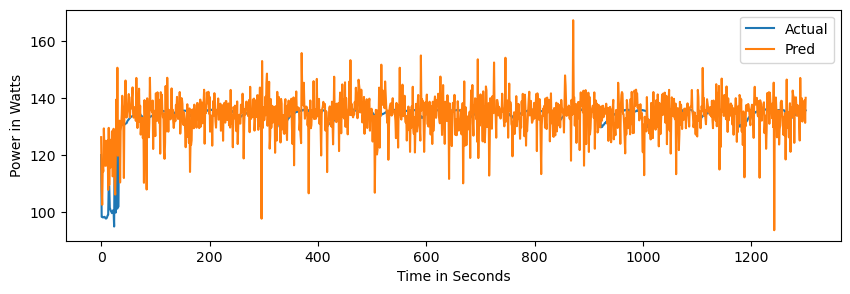

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

d=2
model=make_pipeline(PolynomialFeatures(degree=d,interaction_only=True),LinearRegression())


model.fit(X1, y1)
y_pred = model.predict(X2)
y_pred=destandardize(y_pred)

mae = mean_absolute_error(oldY, y_pred)
mape = mean_absolute_percentage_error(oldY, y_pred)
print(model)
print("Mean absolute error:", round(mae, 2))
print("Mean absolute percentage error:", round((mape*100), 2))
print("Standard deviation of test set:", round(std_, 2))
df_plot = pd.DataFrame({'Actual': oldY, 'Pred': y_pred.flatten()})
plt.figure(figsize=(10, 3))
plt.plot(df_plot)
plt.legend(df_plot.columns)
plt.ylabel("Power in Watts")
plt.xlabel("Time in Seconds")
plt.show()



In [ ]:
results_df.T

,MAE,MAPE,STD
NN,35.25,12.51,21.42
Linear Regression,9.25,3.28,21.42
Decision Tree,21.19,7.35,21.42
Random Forest,18.07,6.46,21.42
SVR,19.50,7.05,21.42
XGBoost,16.20,5.82,21.42
Lasso,8.73,3.09,21.42


In [ ]:
results2_df.T

,MAE,MAPE,STD
NN,16.48,5.83,21.42
Linear Regression,18.23,6.43,21.42
Decision Tree,27.67,9.82,21.42
Random Forest,23.63,8.58,21.42
SVR,28.75,10.19,21.42
XGBoost,18.96,6.91,21.42
Lasso,12.43,4.45,21.42


In [ ]:
# convert results to dataframe
results_df = pd.DataFrame(results, index=['MAE', 'MAPE', 'STD'])

,model,MAE_0,MAPE_1,STD_2
0,NN,35.25,12.51,21.42
1,Linear Regression,9.25,3.28,21.42
2,Decision Tree,21.19,7.35,21.42
3,Random Forest,18.07,6.46,21.42
4,SVR,19.50,7.05,21.42
5,XGBoost,16.20,5.82,21.42
6,Lasso,8.73,3.09,21.42


In [ ]:
for i, row in results_df.T.iterrows():
    print(row['MAE'])
    print(row['MAPE'])
    print(row['STD'])
    print()

35.25
12.51
21.42

9.25
3.28
21.42

21.19
7.35
21.42

18.07
6.46
21.42

19.5
7.05
21.42

16.2
5.82
21.42

8.73
3.09
21.42



In [ ]:
for i, row in results2_df.T.iterrows():
    print(row['MAE'])
    print(row['MAPE'])
    print(row['STD'])
    print(0)

16.48
5.83
21.42
0
18.23
6.43
21.42
0
27.67
9.82
21.42
0
23.63
8.58
21.42
0
28.75
10.19
21.42
0
18.96
6.91
21.42
0
12.43
4.45
21.42
0


In [ ]:
tmp = "datasets/final-exp17app2model1.csv"
temp_df = pd.read_csv(tmp)
temp_df

,Unnamed: 0,LLC-load-misses,LLC-loads,LLC-store-misses,LLC-stores,blocks,bytes,cycles,instructions,ref-cycles,pkg_pwr,ram_pwr,power
0,0,878,2126,0,0,0,0,372188,78380,308614,176.45,16.44,251.0
1,1,992,2350,0,0,0,0,351954,79392,352038,176.59,16.33,251.0
2,2,48173968,553674084,25284332,124290330,296,151552,107122588228,36393088368,108764666622,176.95,16.48,261.4
3,3,37915258,427590678,19727786,96246512,0,0,82734605304,28122256200,84045512414,177.40,16.51,260.7
4,4,38268398,407129886,19753044,93894320,56,28672,80915501474,27328650288,81979099030,176.42,16.61,248.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1263,1263,12102,449372,18392,74896,0,0,72150830,35979294,75426120,67.01,13.37,125.3
1264,1264,524,2562,212,480,0,0,2197352,2139978,3202014,66.48,13.29,125.9
1265,1265,4368,2258,132,438,0,0,1283484,1206898,2225434,113.83,14.81,125.9
1266,1266,698,2144,144,270,0,0,603962,423770,762542,175.94,16.29,126.4


In [ ]:
temp_df = temp_df.drop(temp_df.index[425:650])

In [ ]:
temp_df.to_csv(tmp)

In [ ]:
temp_df.iloc[423]

Unnamed: 0          424.00
LLC-load-misses       0.00
LLC-loads           153.00
LLC-store-misses      7.00
LLC-stores            0.00
blocks                0.00
bytes                 0.00
cycles                0.00
instructions          0.00
ref-cycles            0.00
pkg_pwr              64.61
ram_pwr              13.22
power               130.30
Name: 424, dtype: float64

In [ ]:
temp_df

,Unnamed: 0,LLC-load-misses,LLC-loads,LLC-store-misses,LLC-stores,blocks,bytes,cycles,instructions,ref-cycles,pkg_pwr,ram_pwr,power
0,0,9135,28721,0,0,0,0,4448285,1125702,4448361,176.45,16.44,251.0
1,1,3517,6284,0,0,0,0,1061203,211610,1061220,176.59,16.33,251.0
2,2,7629,14446,0,0,0,0,2348710,475929,2348691,176.95,16.48,261.4
3,3,2585,3526,0,0,0,0,670335,81059,670358,177.40,16.51,260.7
4,4,270,608,0,0,0,0,93595,18850,93610,176.42,16.61,248.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1263,1263,1084,3276,0,0,0,0,364248,52666,404386,67.01,13.37,125.3
1264,1264,200,524,0,0,0,0,0,0,72404,66.48,13.29,125.9
1265,1265,2163,3644,0,0,0,0,432524,58793,778297,113.83,14.81,125.9
1266,1266,399,963,0,0,0,0,0,0,199916,175.94,16.29,126.4


In [ ]:
temp_df.drop(temp_df.index[423:424], inplace=True)

In [ ]:
temp_df

,Unnamed: 0,LLC-load-misses,LLC-loads,LLC-store-misses,LLC-stores,blocks,bytes,cycles,instructions,ref-cycles,pkg_pwr,ram_pwr,power
0,0,9135,28721,0,0,0,0,4448285,1125702,4448361,176.45,16.44,251.0
1,1,3517,6284,0,0,0,0,1061203,211610,1061220,176.59,16.33,251.0
2,2,7629,14446,0,0,0,0,2348710,475929,2348691,176.95,16.48,261.4
3,3,2585,3526,0,0,0,0,670335,81059,670358,177.40,16.51,260.7
4,4,270,608,0,0,0,0,93595,18850,93610,176.42,16.61,248.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1263,1263,1084,3276,0,0,0,0,364248,52666,404386,67.01,13.37,125.3
1264,1264,200,524,0,0,0,0,0,0,72404,66.48,13.29,125.9
1265,1265,2163,3644,0,0,0,0,432524,58793,778297,113.83,14.81,125.9
1266,1266,399,963,0,0,0,0,0,0,199916,175.94,16.29,126.4


In [ ]:
preds_1['exp10app1']['Random Forest']

array([125.79988453, 128.75988453, 126.53888453, ..., 124.00188453,
       127.58388453, 132.75088453])

In [ ]:
preds_2['exp10app2']['Random Forest']

array([165.13988453, 168.81488453, 177.74088453, ..., 170.90388453,
       149.20888453, 158.00788453])

In [ ]:
df_tf = pd.read_csv('tracefile-all_sys.csv')

In [ ]:
df_tf['power'] -= 118

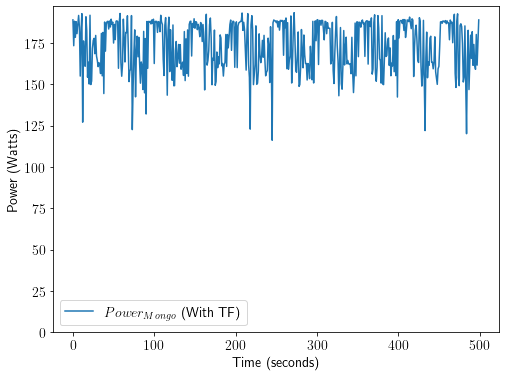

In [ ]:
df5 = pd.DataFrame({'$Power_{Mongo}$ (With TF)': preds_2['exp10app2']['Random Forest'][:500]})

# fig, ax = plt.subplots()
plt.figure(figsize=(8, 6))
plt.rc('font', size=14)
plt.rc('text', usetex=True)
plt.plot(df5)
plt.legend(df5.columns)
plt.ylabel("Power (Watts)")
plt.xlabel("Time (seconds)")
plt.ylim(ymin=0)
# plt.ylim(y)

# image_format = 'eps'
# image_name = 'isolation_cpu.eps'
# plt.savefig(image_name, format=image_format, dpi=1200, bbox_inches='tight')

plt.show()

In [ ]:
df_mnn = pd.read_csv('tracefile-.csv')

In [ ]:
df_mnn['power'] -= 118

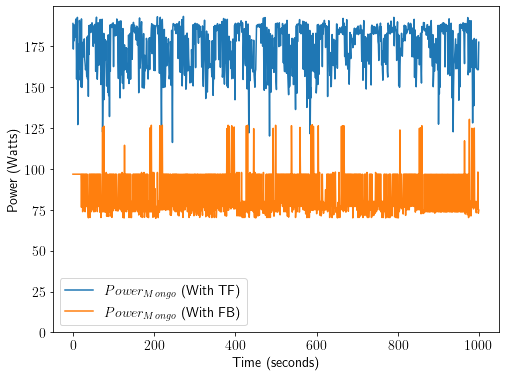

In [ ]:
df5 = pd.DataFrame({'$Power_{Mongo}$ (With TF)': preds_2['exp10app2']['Random Forest'][:1000], '$Power_{Mongo}$ (With FB)': preds_2['exp14app2']['Random Forest'][:1000]})

# fig, ax = plt.subplots()
plt.figure(figsize=(8, 6))
plt.rc('font', size=14)
plt.rc('text', usetex=True)
plt.plot(df5)
plt.legend(df5.columns)
plt.ylabel("Power (Watts)")
plt.xlabel("Time (seconds)")
plt.ylim(ymin=0)
# plt.ylim(y)

# image_format = 'eps'
# image_name = 'isolation_cpu.eps'
# plt.savefig(image_name, format=image_format, dpi=1200, bbox_inches='tight')

plt.show()

In [ ]:
df_all['exp12'].iloc[400:700]

,LLC-load-misses,LLC-loads,LLC-store-misses,LLC-stores,blocks,bytes,cycles,instructions,ref-cycles,pkg_pwr,ram_pwr,power
400,1993994,12536078,1257914,4051794,0,0,218323162196,82400775038,218435456722,168.87,14.11,244.0
401,1472898,9875470,1135722,3463458,0,0,209924722916,79416912222,209976325134,168.86,14.14,244.1
402,1816674,12591698,1224562,3966602,0,0,231684426056,87417281360,231740322034,169.55,14.15,244.2
403,755678,10049736,669830,3815452,0,0,167882099718,64423385290,167999105550,169.37,14.09,244.3
404,643174,10984496,561980,3699402,0,0,207583690170,79384265356,207717940022,169.46,14.02,244.4
...,...,...,...,...,...,...,...,...,...,...,...,...
695,50603738,447853010,33359610,106555724,0,0,138819900318,90120008580,138863145134,176.14,17.76,226.4
696,49673884,436815920,33375440,107173962,0,0,138448766028,89504604492,138503431848,176.55,17.81,261.8
697,60059134,555317472,40198538,133430518,0,0,173342109328,112208000714,173355260320,176.53,17.84,261.8
698,48200736,450159358,32649686,108363800,0,0,138276735508,90331750666,138320432318,176.61,17.78,261.8


/Users/roton/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


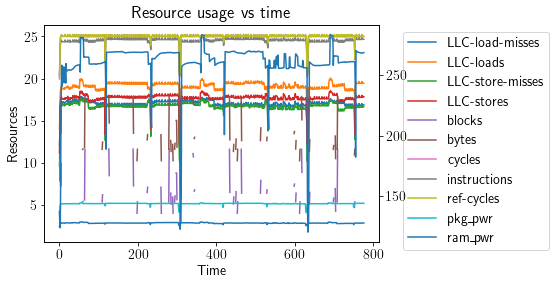

In [ ]:
df = df_all['all_mnn']

# Create a figure and axes object
fig, ax = plt.subplots()

# Creating logarithmic data to view plot properly
df_log = df.apply(lambda x: np.log(x))
# df_log = df


# Loop through each column in the dataframe
for column in df_log.columns:
    # Plot the data in the column
    if column == 'power':
        continue
    ax.plot(df_log.index, df_log[column])

# Adjust the position of the legend
ax.legend(df_log.columns, bbox_to_anchor=(1.05, 1), loc="upper left")

ax2 = ax.twinx()

ax2.plot(df_log.index, df['power'])


# Add labels and title
ax.set_xlabel("Time")
ax.set_ylabel("Resources")
ax.set_title("Resource usage vs time")

# Show the plot
plt.show()

/Users/roton/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


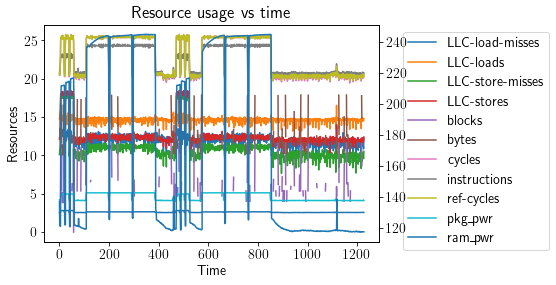

In [ ]:
df = df_all['all_sys']

# Create a figure and axes object
fig, ax = plt.subplots()

# Creating logarithmic data to view plot properly
df_log = df.apply(lambda x: np.log(x))
# df_log = df


# Loop through each column in the dataframe
for column in df_log.columns:
    # Plot the data in the column
    if column == 'power':
        continue
    ax.plot(df_log.index, df_log[column])

# Adjust the position of the legend
ax.legend(df_log.columns, bbox_to_anchor=(1.05, 1), loc="upper left")

ax2 = ax.twinx()

ax2.plot(df_log.index, df['power'])


# Add labels and title
ax.set_xlabel("Time")
ax.set_ylabel("Resources")
ax.set_title("Resource usage vs time")

# Show the plot
plt.show()

/Users/roton/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


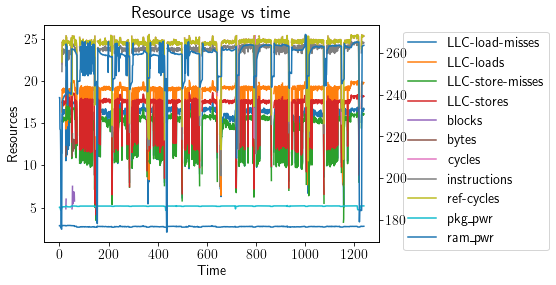

In [ ]:
df = df_all['exp8app2']

# Create a figure and axes object
fig, ax = plt.subplots()

# Creating logarithmic data to view plot properly
df_log = df.apply(lambda x: np.log(x))
# df_log = df


# Loop through each column in the dataframe
for column in df_log.columns:
    # Plot the data in the column
    if column == 'power':
        continue
    ax.plot(df_log.index, df_log[column])

# Adjust the position of the legend
ax.legend(df_log.columns, bbox_to_anchor=(1.05, 1), loc="upper left")

ax2 = ax.twinx()

ax2.plot(df_log.index, df['power'])


# Add labels and title
ax.set_xlabel("Time")
ax.set_ylabel("Resources")
ax.set_title("Resource usage vs time")

# Show the plot
plt.show()

In [ ]:
for i in range(7,18):
    if i == 9:
        continue
    a = (round(np.mean(preds_1['exp' + str(i) + 'app1']['Random Forest']),2))
    b = (round(np.mean(preds_2['exp' + str(i) + 'app2']['Random Forest']),2))
    A = round(a - (a/(a+b))*svr_i[0], 2)
    B = round(b - (b/(a+b))*svr_i[0], 2)
    print(A, B)
    print(0)

84.56 65.08
0
46.34 51.3
0
67.48 108.73
0
45.06 84.65
0
49.98 62.35
0
61.91 39.0
0
39.78 35.33
0
107.0 54.11
0
100.32 85.32
0
33.81 75.41
0


In [ ]:
(df_all['exp7']['power'])

0       290.7
1       290.7
2       290.8
3       290.9
4       291.0
        ...  
1237    296.9
1238    283.2
1239    283.7
1240    291.1
1241    290.9
Name: power, Length: 1242, dtype: float64

In [ ]:
preds_1['exp' + str(i) + 'app1']['Random Forest']

array([68.91588453, 60.00788453, 61.10688453, ..., 64.04888453,
       95.28546433, 63.90988453])

In [ ]:
preds_2['exp' + str(i) + 'app2']['Random Forest']

array([ 63.72488453,  63.72488453, 119.79788453, ...,  61.18688453,
        59.19588453,  59.24088453])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


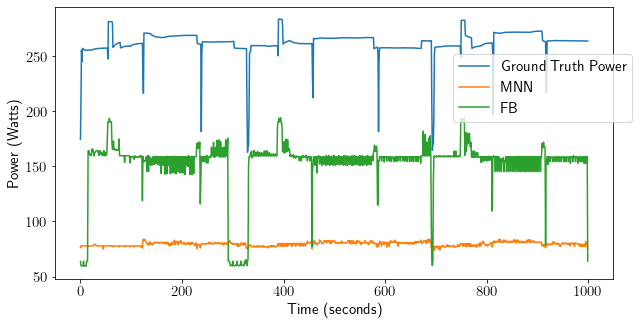

In [ ]:
df5 = pd.DataFrame({'Ground Truth Power': df_all['exp11']['power'][:1000], 'MNN': preds_1['exp11app1']['Random Forest'][:1000], 'FB': preds_2['exp11app2']['Random Forest'][:1000]})

# fig, ax = plt.subplots()
plt.figure(figsize=(10, 5))
plt.rc('font', size=15)
plt.plot(df5, )
plt.legend(df5.columns, loc="best", bbox_to_anchor=(0.7, 0.55))
plt.ylabel("Power (Watts)")
plt.xlabel("Time (seconds)")
# plt.ylim(y)

image_format = 'eps'
image_name = 'rapl1.eps'
plt.savefig(image_name, format=image_format, dpi=1200, bbox_inches='tight')

plt.show()



In [ ]:
for i in range(7,18):
    if i == 9:
        continue
    print('\nexp' + str(i))
    print(round(np.mean(df_all['exp' + str(i)]['power']-118), 2))
    print('app1')
    for y in df_all['exp' + str(i)]:
        print(round(np.mean(df_all['exp' + str(i) + 'app1'][y]), 2))
    print('app2')
    for y in df_all['exp' + str(i)]:
        print(round(np.mean(df_all['exp' + str(i) + 'app2'][y]), 2))


exp7
175.83
app1
38520525.33
275211960.67
11346912.6
45605224.09
3656.3
1872026.18
84941442511.73
50372324662.2
84370200928.19
194.73
20.68
293.83
app2
12764522.16
108727772.08
7064419.23
24549280.17
1305.34
668335.2
59119292360.67
29367806714.48
59029527787.42
194.73
20.68
293.83

exp8
138.9
app1
1849797.41
35414380.32
2108122.56
9809145.27
22.98
11764.37
55820651255.87
19236528557.08
55841906419.88
175.07
15.4
257.33
app2
9095734.58
161025027.41
4166723.81
34624645.37
16.98
8694.5
47998159339.6
22020820666.89
48010427884.09
174.68
15.41
256.9

exp10
172.67
app1
11474746.33
135261334.43
1114298.12
14232865.71
124.01
63493.83
13822589775.99
7340433008.57
13947673154.25
191.57
23.11
290.67
app2
163869160.22
978594206.18
23038751.46
112700689.22
335.53
171790.83
100891071894.64
89977248721.57
101085523927.02
191.57
23.11
290.67

exp11
144.47
app1
14080.19
100176.62
8622.85
21392.25
0.0
0.0
7857216436.06
16547951990.45
7859926432.39
177.03
17.39
262.27
app2
44250670.75
401222264.54
33657